# 미국 주식 데이터 분석 프로젝트

### 1. 데이터 불러오기

In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
plt.style.use("fivethirtyeight")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [359]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'NFLX', 'NVDA', 'TWTR', 'TSLA', 'SBUX', 'PYPL', 'UAL', 'T']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [360]:
company_list = [AAPL, GOOG, MSFT, AMZN, NFLX, NVDA, TWTR, TSLA, SBUX, PYPL, UAL, T]
company_name = ["Apple", "Google", "Microsoft", "Amazon", "Netflix", "Nvidia", "Twitter", "Tesla", "Starbucks", "Paypal", "United Airlines", "AT&T"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df

High        Low       Open      Close       Volume  \
Date                                                                  
2012-01-23  15.301786  15.082143  15.095357  15.264643  306062400.0   
2012-01-24  15.182143  14.983929  15.182143  15.014643  547638000.0   
2012-01-25  16.230356  15.847500  16.230000  15.952143  958314000.0   
2012-01-26  16.028214  15.826429  16.012857  15.879643  323985200.0   
2012-01-27  16.017143  15.848929  15.869286  15.974286  299709200.0   
...               ...        ...        ...        ...          ...   
2022-01-14  27.230000  26.469999  26.620001  27.180000   54824200.0   
2022-01-18  27.469999  26.910000  27.209999  27.309999   60610100.0   
2022-01-19  27.480000  26.780001  27.450001  27.280001   50938300.0   
2022-01-20  27.410000  26.959999  27.129999  27.020000   42038700.0   
2022-01-21  27.000000  26.450001  26.840000  26.610001   60169300.0   

            Adj Close company_name  
Date                                
2012-01-23  13.087372        Apple  
2012-01-24  12.873031        Apple  
2012-01-25  13.676811        Apple  
2012-01-26  13.614653        Apple  
2012-01-27  13.695794        Apple  
...               ...          ...  
2022-01-14  27.180000         AT&T  
2022-01-18  27.309999         AT&T  
2022-01-19  27.280001         AT&T  
2022-01-20  27.020000         AT&T  
2022-01-21  26.610001         AT&T  

[28897 rows x 7 columns]

### 2. EDA

#### 1) Close (종가)

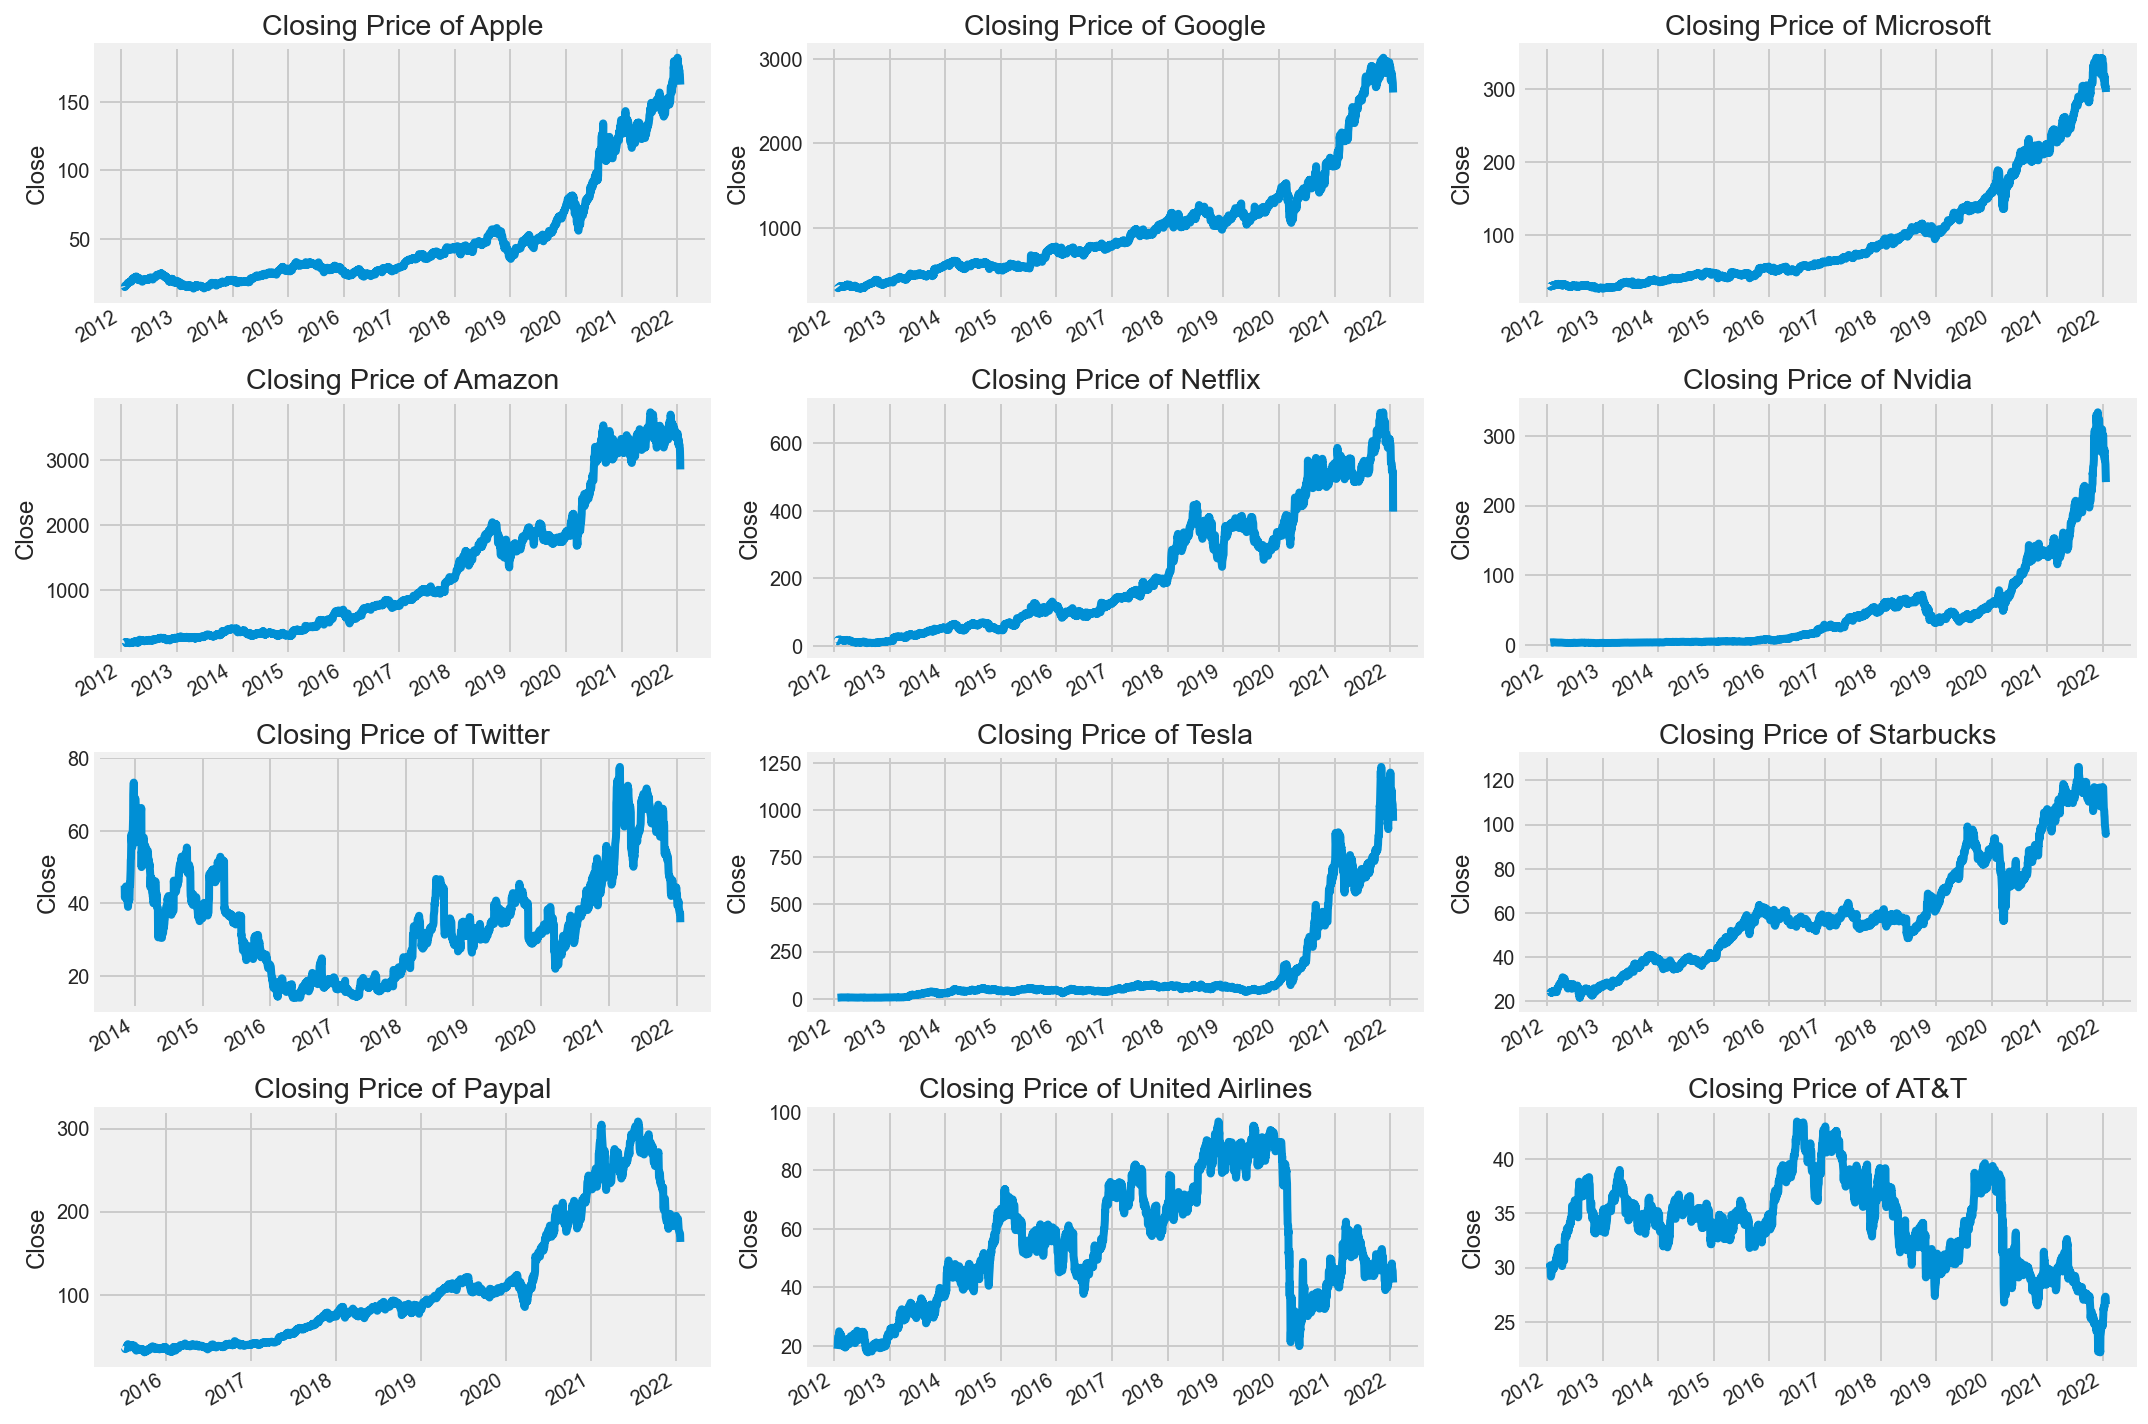

In [361]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 3, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

#### 2) Volume (거래량)

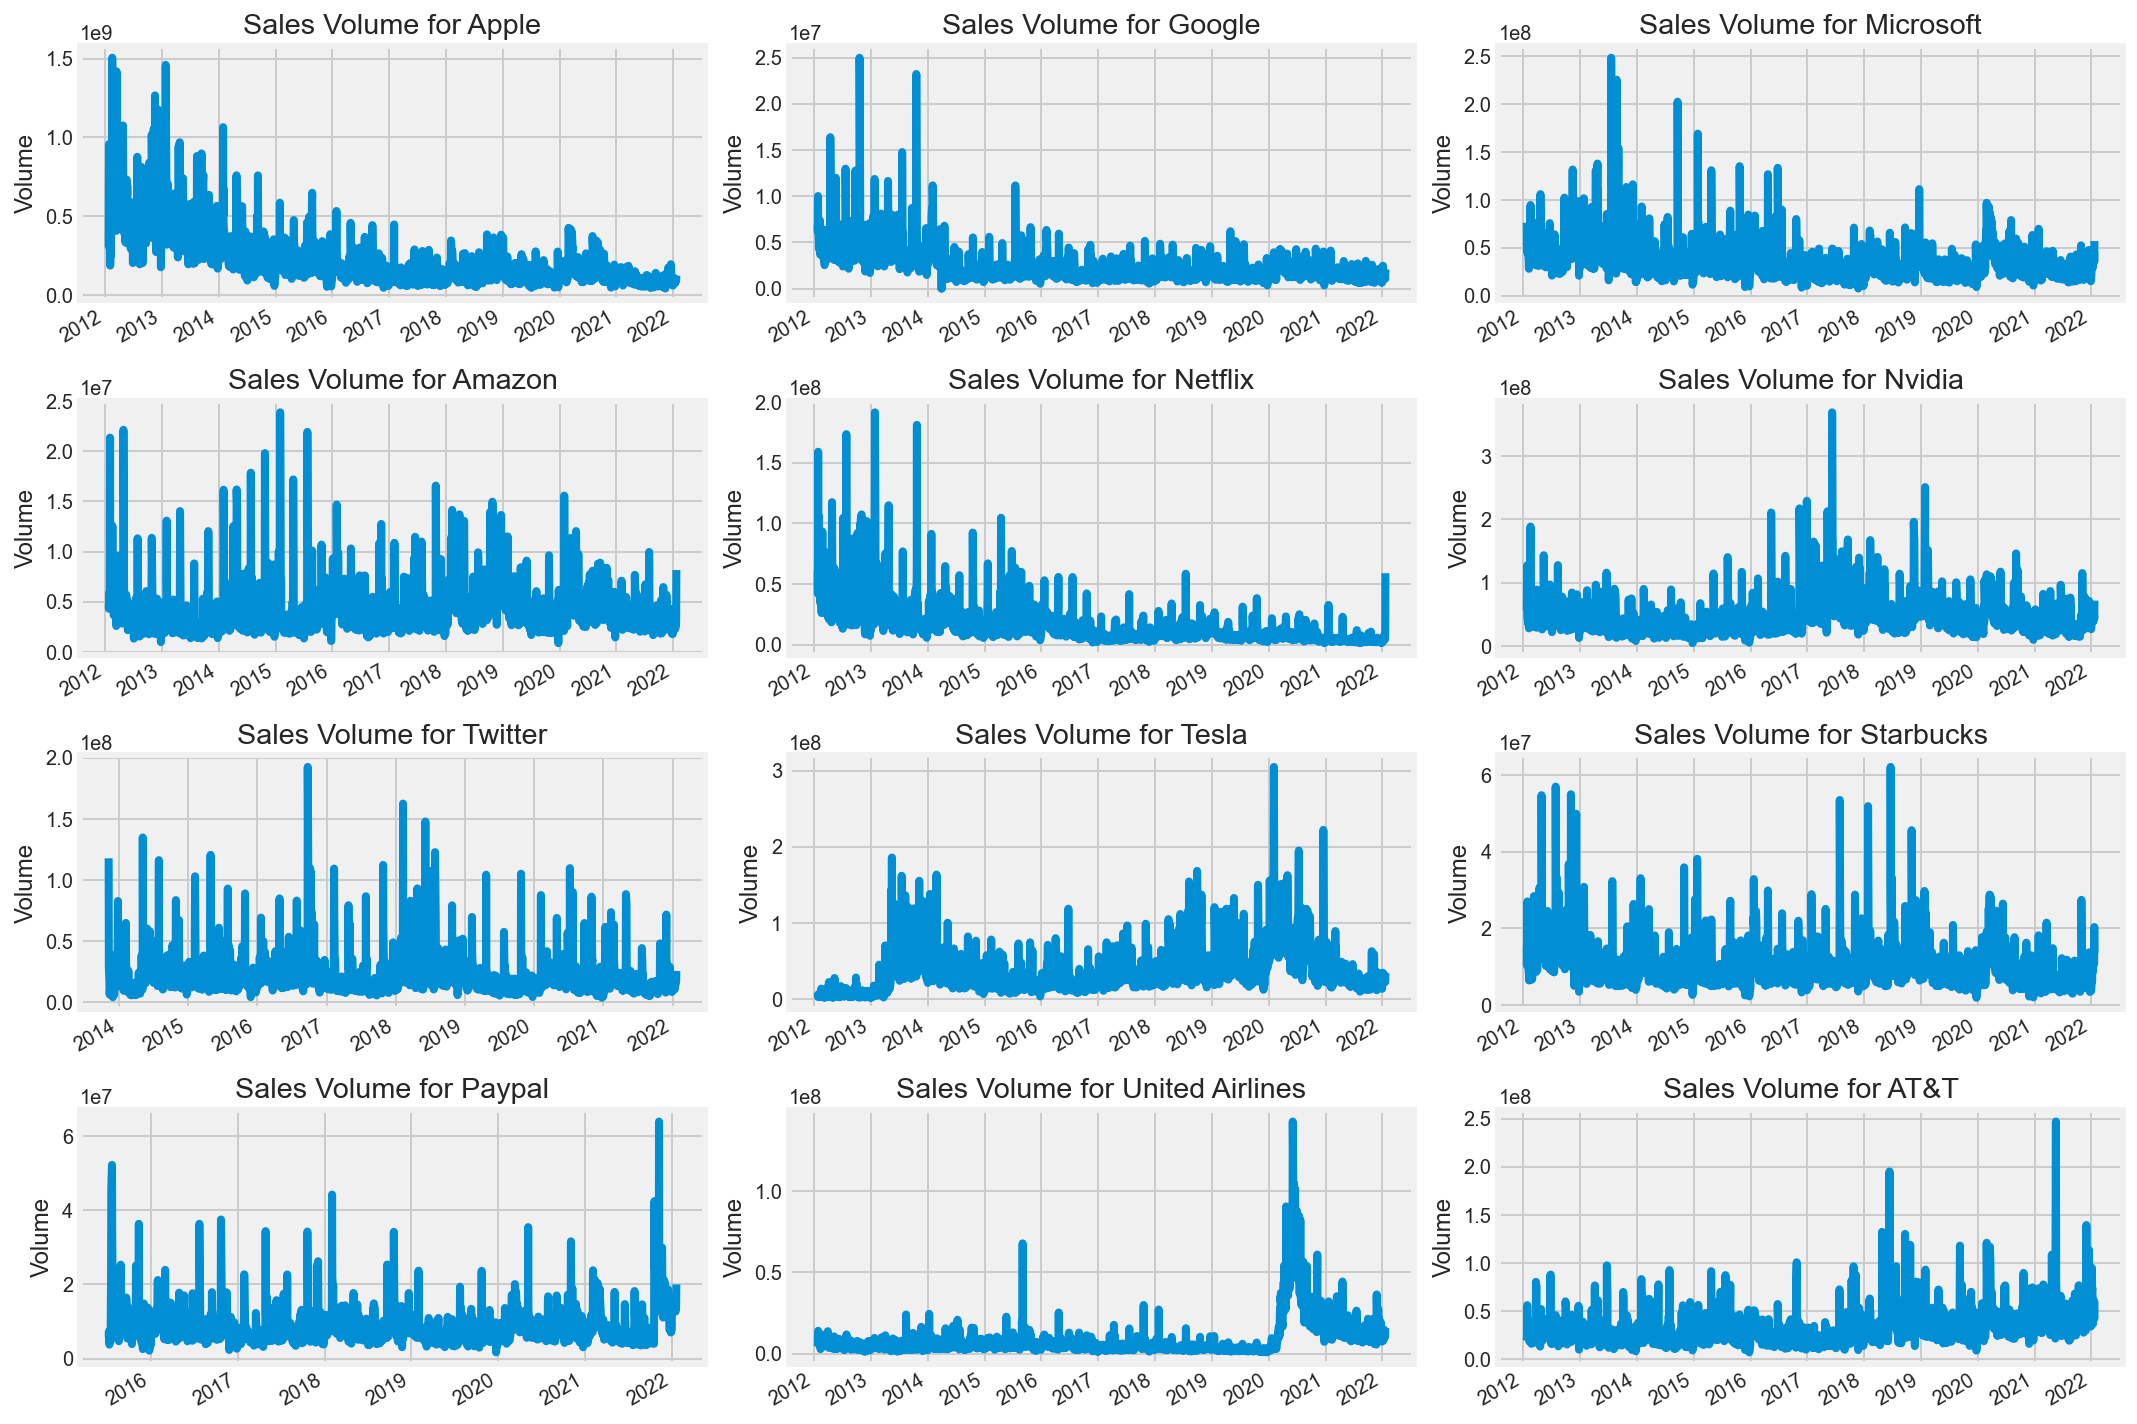

In [362]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

#### 3) Moving Average (이동 평균선) 

In [113]:
ma_day = [5,20,60]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

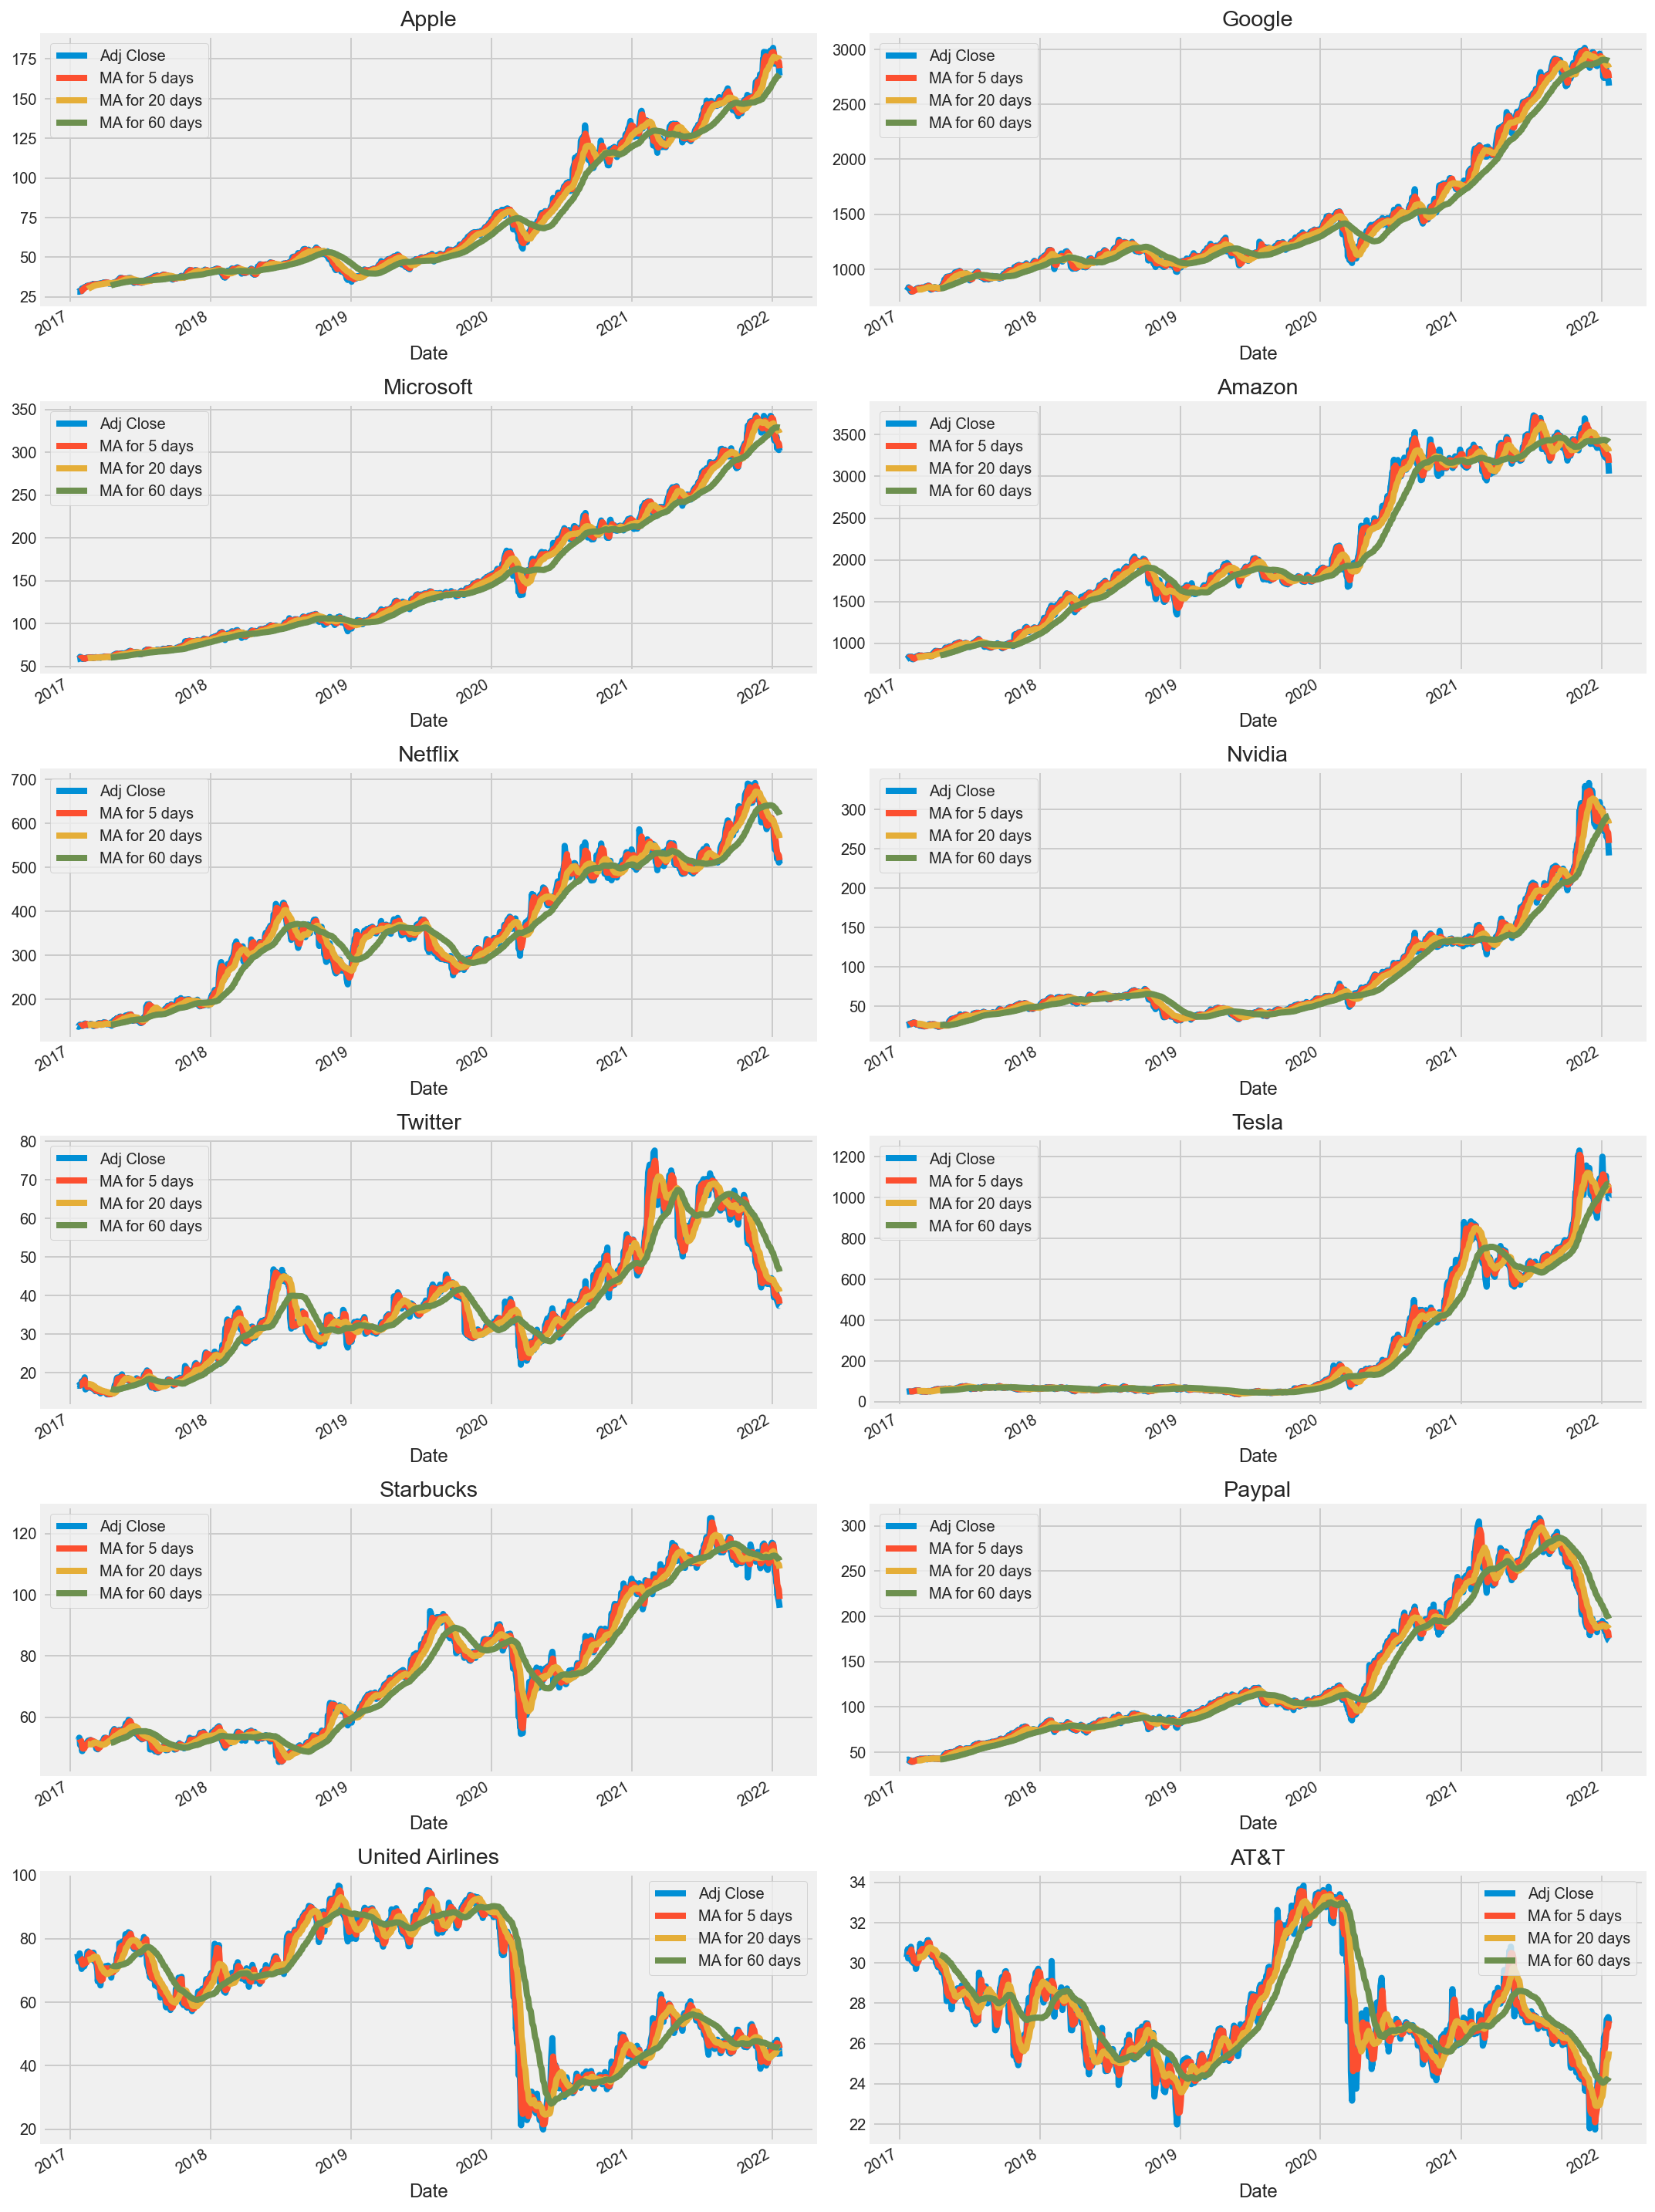

In [129]:
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Apple')

GOOG[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Google')

MSFT[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Microsoft')

AMZN[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Amazon')

NFLX[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Netflix')

NVDA[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Nvidia')

TWTR[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Twitter')

TSLA[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[3,1])
axes[3,1].set_title('Tesla')

SBUX[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[4,0])
axes[4,0].set_title('Starbucks')

PYPL[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[4,1])
axes[4,1].set_title('Paypal')

UAL[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[5,0])
axes[5,0].set_title('United Airlines')

T[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 60 days']].plot(ax=axes[5,1])
axes[5,1].set_title('AT&T')

fig.tight_layout()

#### 4) Daily Return (일일 수익률)

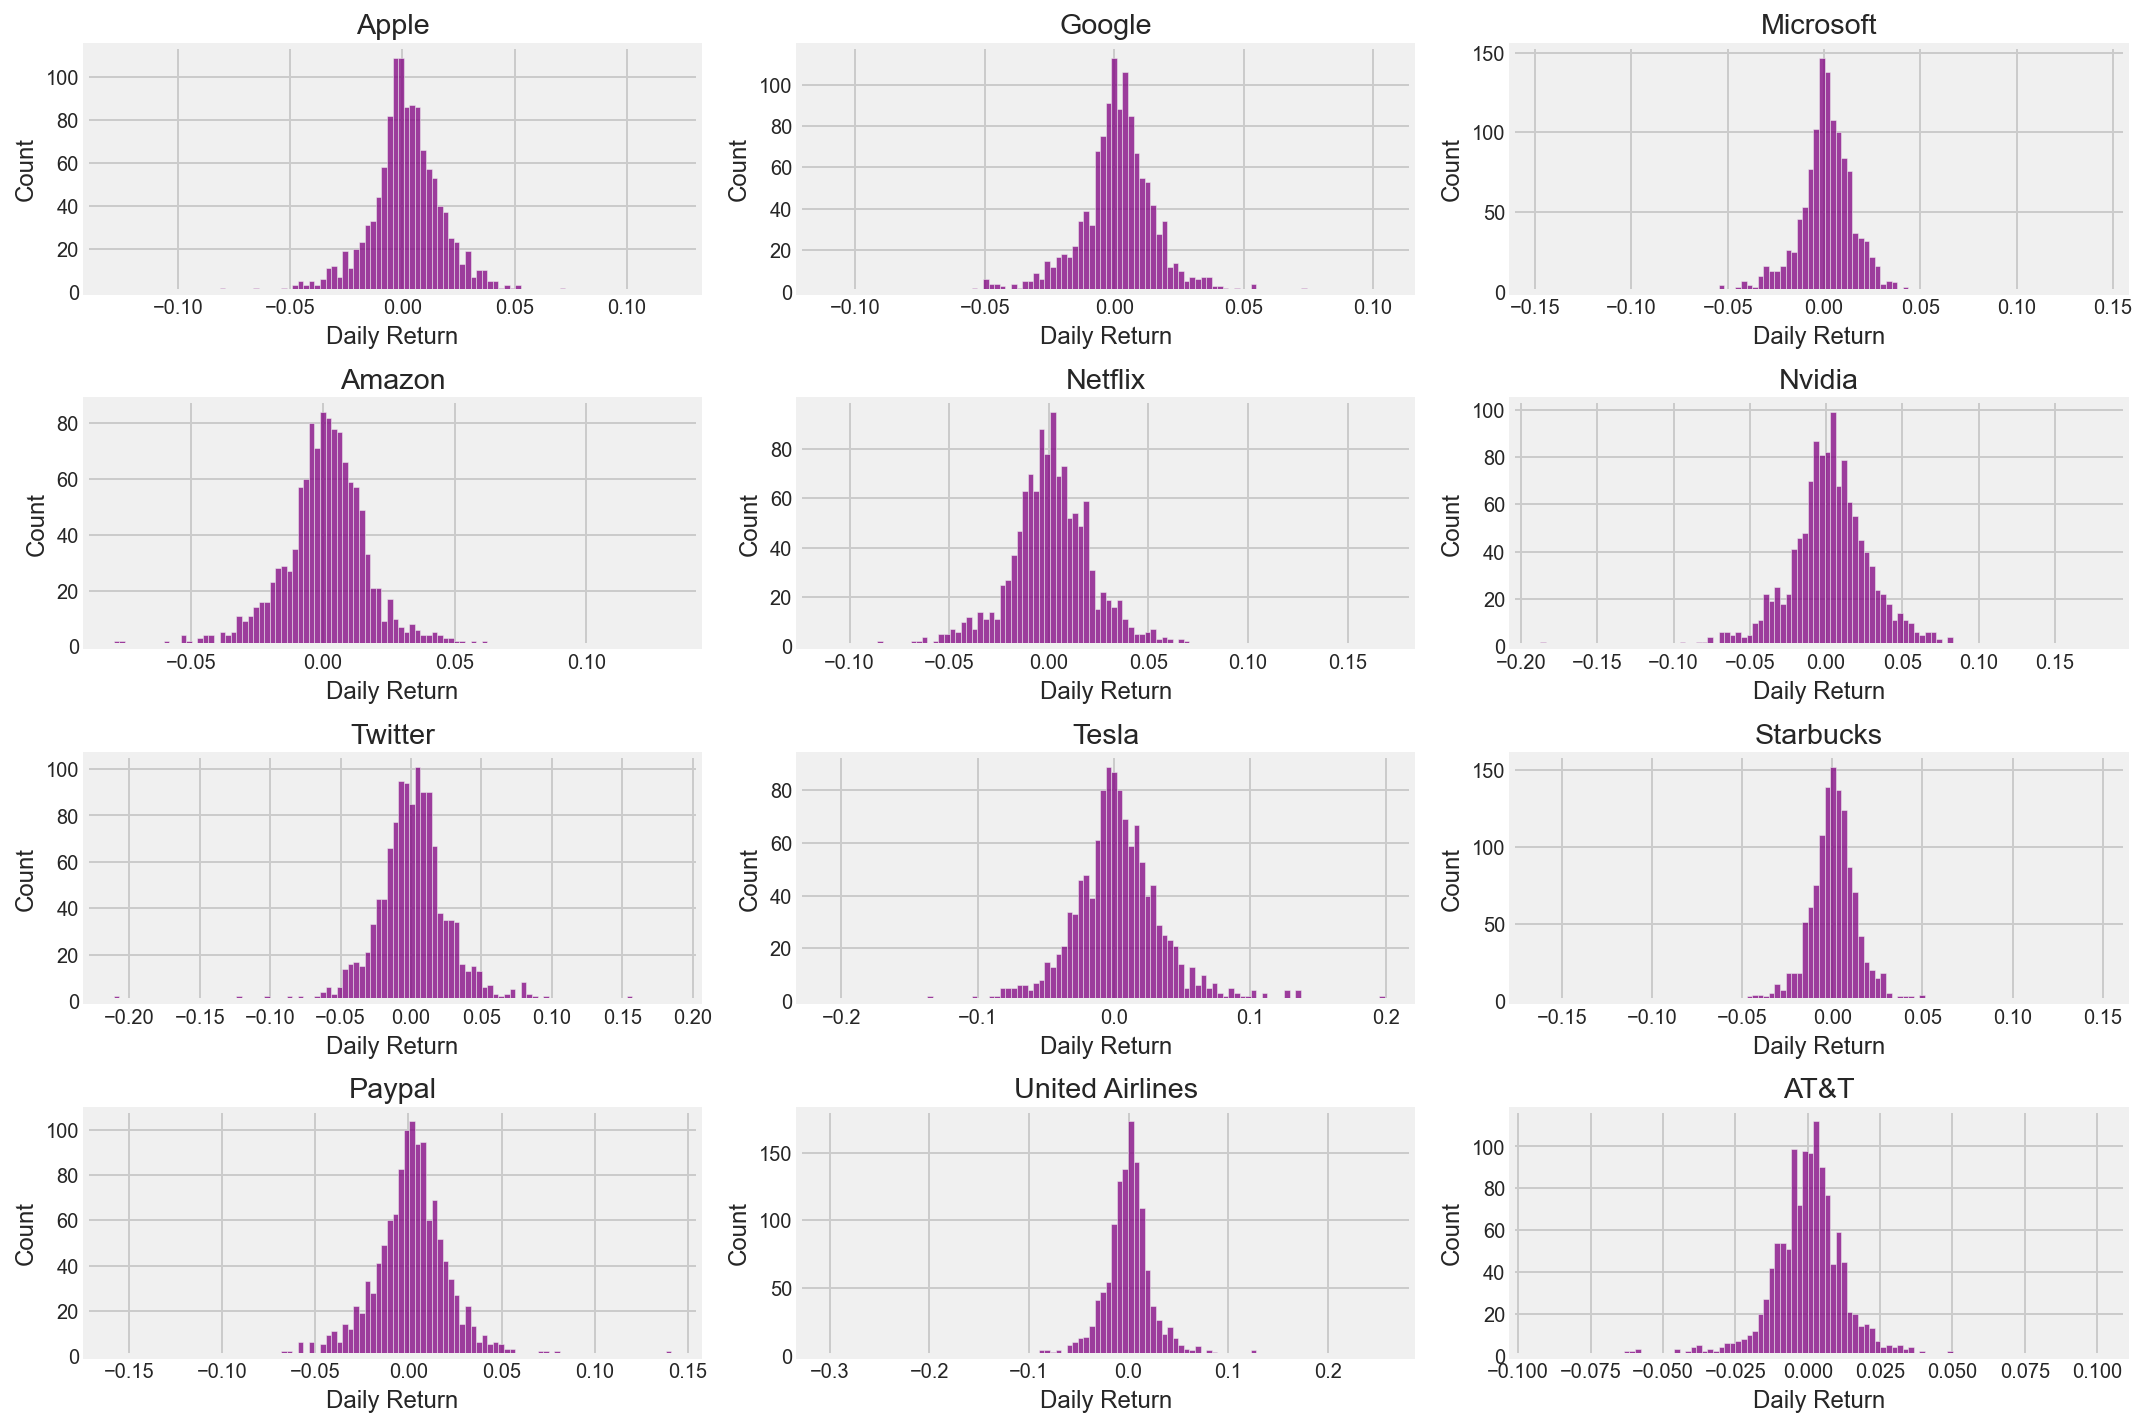

In [131]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(15, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 3, i)
    sns.histplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [91]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols          AAPL        GOOG       MSFT        AMZN        NFLX  \
Date                                                                   
2017-01-19  28.186687  802.174988  57.925175  809.039978  138.410004   
2017-01-20  28.238455  805.020020  58.334286  808.330017  138.600006   
2017-01-23  28.257277  819.309998  58.538830  817.880005  137.389999   
2017-01-24  28.231396  823.869995  59.059502  822.440002  140.110001   
2017-01-25  28.680859  835.669983  59.208279  836.520020  139.520004   

Symbols          NVDA       TWTR       TSLA       SBUX       PYPL        UAL  \
Date                                                                           
2017-01-19  25.947996  16.790001  48.751999  52.552856  41.270000  74.019997   
2017-01-20  25.664234  16.580000  48.945999  52.344051  41.689999  75.239998   
2017-01-23  25.930719  16.610001  49.784000  52.434841  41.619999  72.750000   
2017-01-24  26.483437  16.520000  50.922001  53.052139  41.959999  73.180000   
2017-01-25  26.596937  16.730000  50.894001  53.288181  41.709999  73.589996   

Symbols             T  
Date                   
2017-01-19  29.953489  
2017-01-20  30.282244  
2017-01-23  30.684053  
2017-01-24  30.216496  
2017-01-25  30.238403

In [84]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols         AAPL      GOOG      MSFT      AMZN      NFLX      NVDA  \
Date                                                                     
2017-01-19       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-20  0.001837  0.003547  0.007063 -0.000878  0.001373 -0.010936   
2017-01-23  0.000667  0.017751  0.003506  0.011814 -0.008730  0.010384   
2017-01-24 -0.000916  0.005566  0.008895  0.005575  0.019798  0.021315   
2017-01-25  0.015921  0.014323  0.002519  0.017120 -0.004211  0.004286   

Symbols         TWTR      TSLA      SBUX      PYPL       UAL         T  
Date                                                                    
2017-01-19       NaN       NaN       NaN       NaN       NaN       NaN  
2017-01-20 -0.012508  0.003979 -0.003973  0.010177  0.016482  0.010976  
2017-01-23  0.001809  0.017121  0.001734 -0.001679 -0.033094  0.013269  
2017-01-24 -0.005418  0.022859  0.011773  0.008169  0.005911 -0.015238  
2017-01-25  0.012712 -0.000550  0.004449 -0.005958  0.005603  0.000725

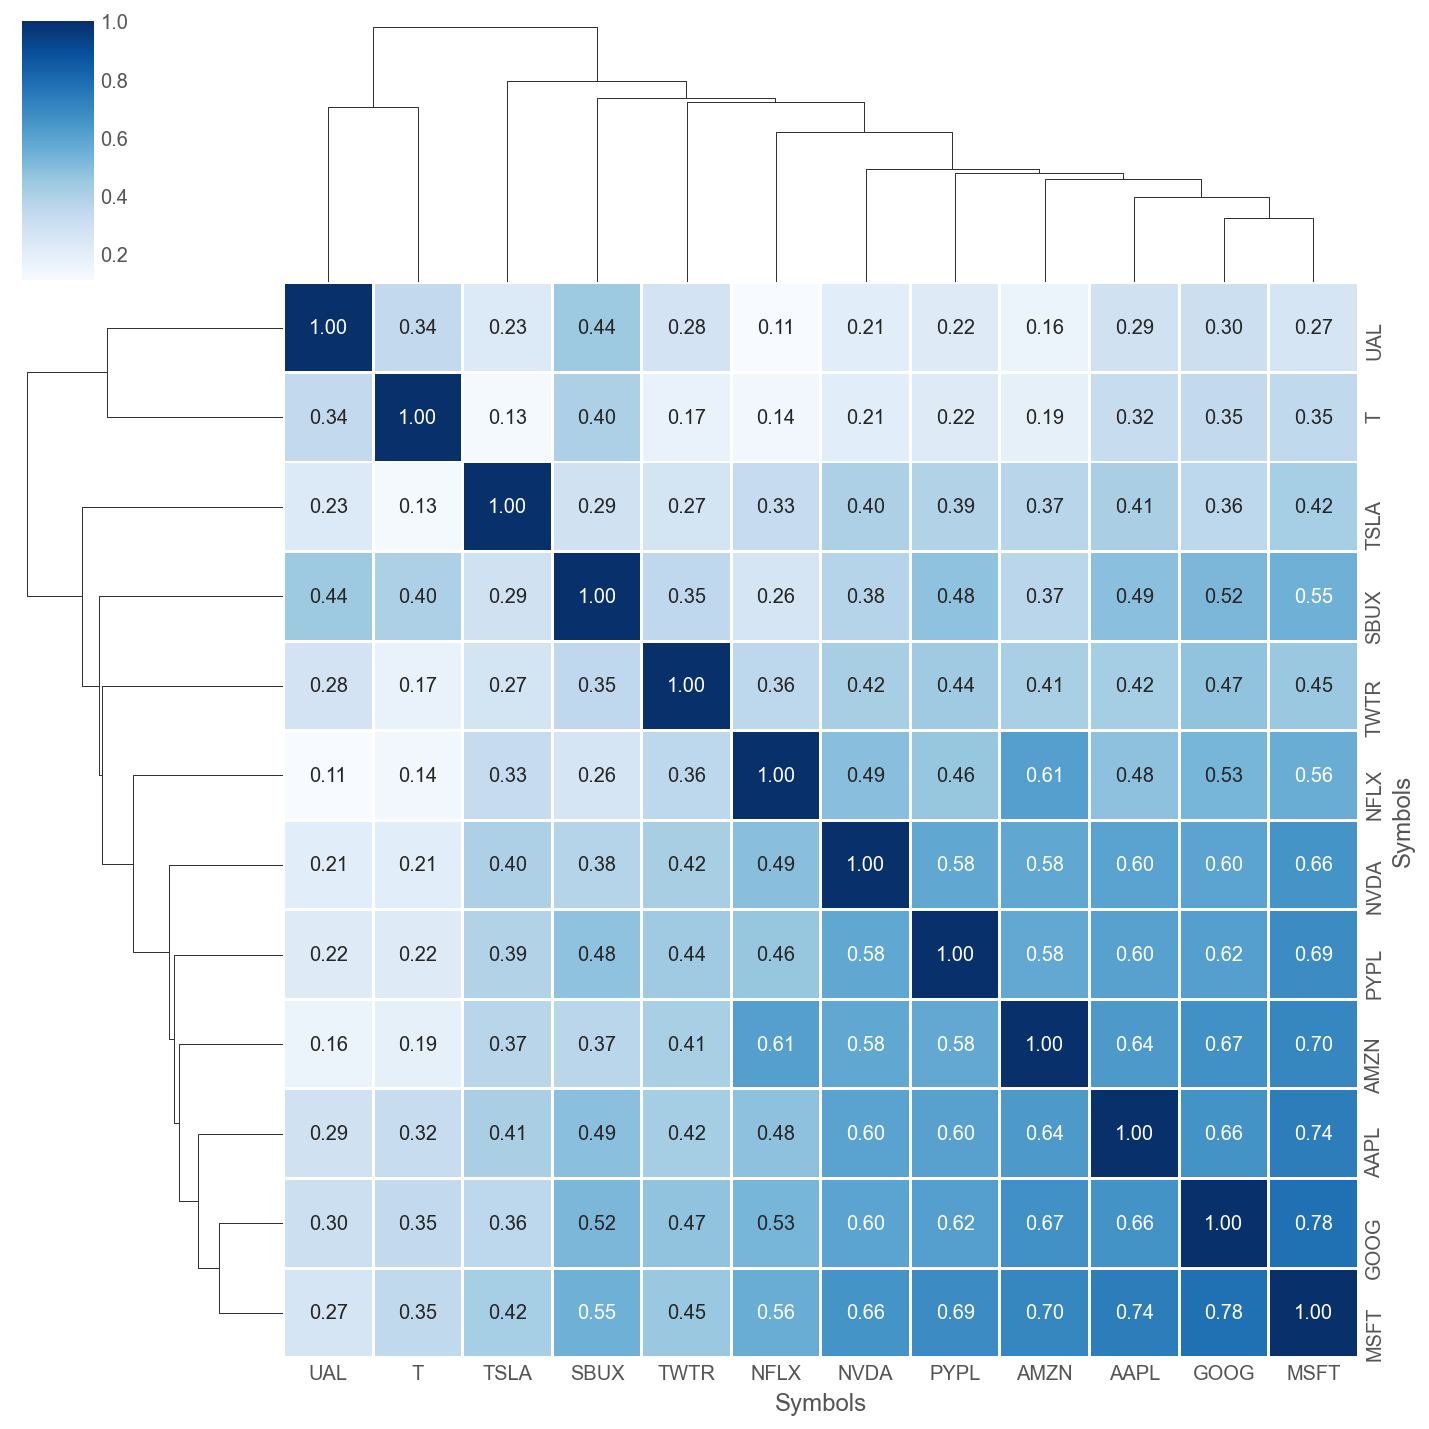

In [85]:
sns.clustermap(tech_rets.corr(), annot=True, fmt=".2f", linewidth=1, cmap='Blues')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

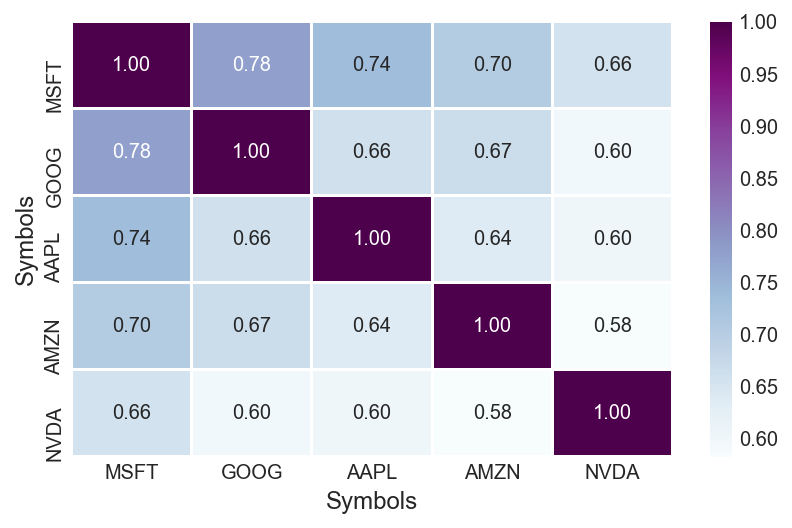

In [138]:
sns.heatmap(tech_rets[['MSFT', 'GOOG', 'AAPL', 'AMZN', 'NVDA']].corr(), annot=True, fmt=".2f", linewidth=1, cmap='BuPu')

In [139]:
df['Volume']

Date
2017-01-20    130391600.0
2017-01-23     88200800.0
2017-01-24     92844000.0
2017-01-25    129510400.0
2017-01-26    105350400.0
                 ...     
2022-01-13     49097800.0
2022-01-14     54824200.0
2022-01-18     60610100.0
2022-01-19     50938300.0
2022-01-20     41999800.0
Name: Volume, Length: 15120, dtype: float64

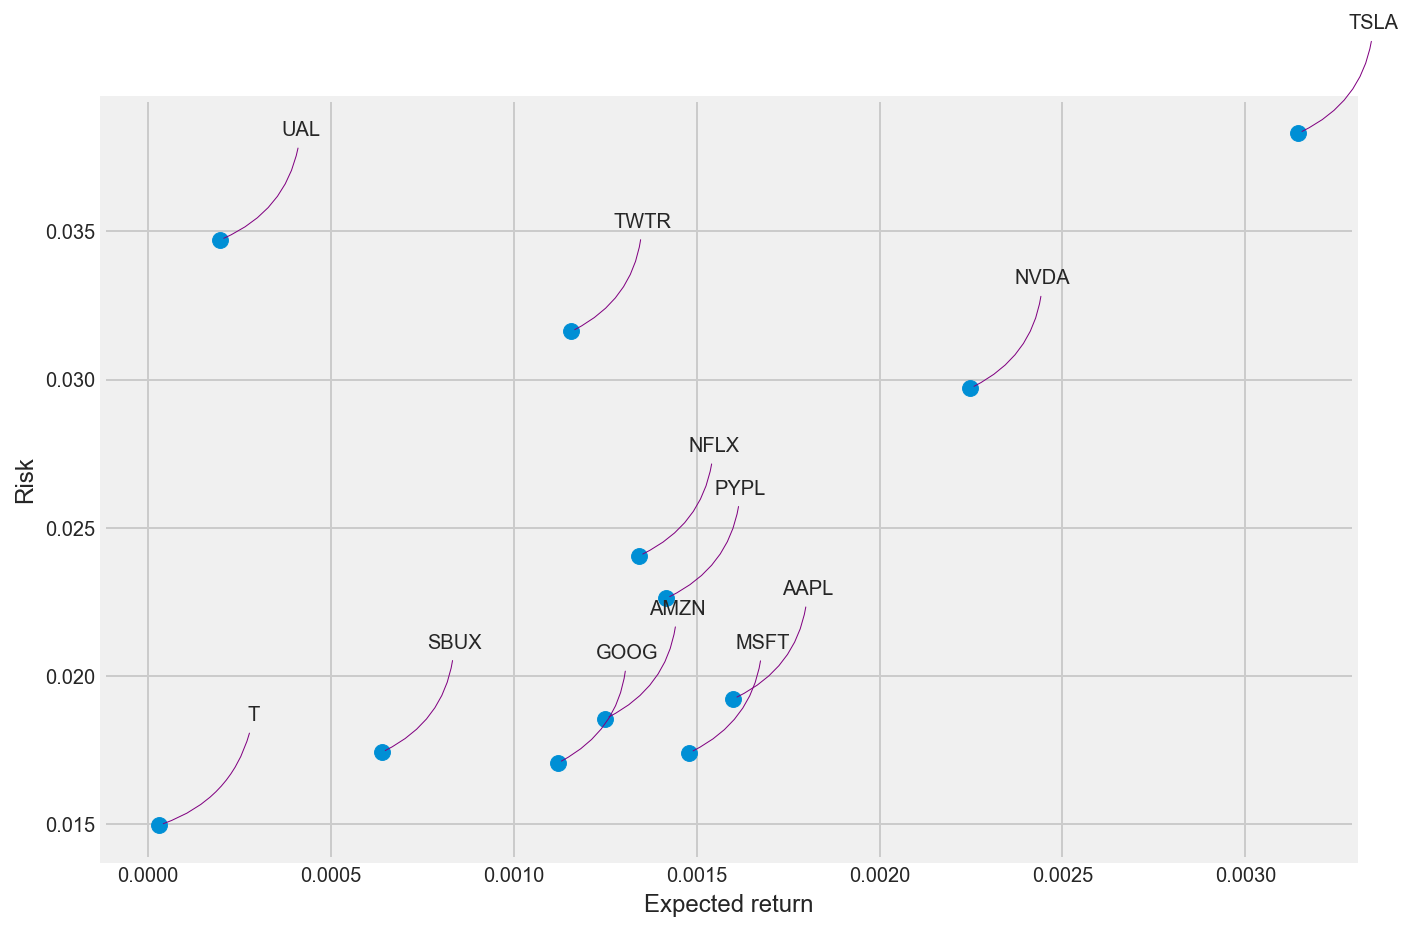

In [141]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='purple', connectionstyle='arc3,rad=-0.3'))


### 3. 주식 예측 LSTM 모델 구축

#### 1) 다변량 LSTM

In [465]:
df = DataReader('AAPL', data_source='yahoo', start = datetime(end.year - 10, end.month, end.day)
, end=datetime.now())
# Show teh data
df

High         Low        Open       Close       Volume  \
Date                                                                      
2012-01-23   15.301786   15.082143   15.095357   15.264643  306062400.0   
2012-01-24   15.182143   14.983929   15.182143   15.014643  547638000.0   
2012-01-25   16.230356   15.847500   16.230000   15.952143  958314000.0   
2012-01-26   16.028214   15.826429   16.012857   15.879643  323985200.0   
2012-01-27   16.017143   15.848929   15.869286   15.974286  299709200.0   
...                ...         ...         ...         ...          ...   
2022-01-14  173.779999  171.089996  171.339996  173.070007   80355000.0   
2022-01-18  172.539993  169.410004  171.509995  169.800003   90956700.0   
2022-01-19  171.080002  165.940002  170.000000  166.229996   94815000.0   
2022-01-20  169.679993  164.179993  166.979996  164.509995   91420500.0   
2022-01-21  166.330002  162.300003  164.419998  162.410004  122501300.0   

             Adj Close  
Date                    
2012-01-23   13.087371  
2012-01-24   12.873032  
2012-01-25   13.676811  
2012-01-26   13.614654  
2012-01-27   13.695796  
...                ...  
2022-01-14  173.070007  
2022-01-18  169.800003  
2022-01-19  166.229996  
2022-01-20  164.509995  
2022-01-21  162.410004  

[2518 rows x 6 columns]

In [466]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])
scaled

array([[0.00734287, 0.00610877, 0.00803411, 0.00783722, 0.18091515],
       [0.00785709, 0.00539943, 0.00744019, 0.00634968, 0.34579966],
       [0.01406573, 0.01161406, 0.01266236, 0.01192796, 0.62610162],
       ...,
       [0.92516614, 0.92968459, 0.92029825, 0.90610636, 0.03673078],
       [0.90727236, 0.92138423, 0.90965516, 0.89587207, 0.0344139 ],
       [0.89210415, 0.90152285, 0.89828653, 0.88337677, 0.05562773]])

In [467]:
df = pd.DataFrame(scaled, columns=scale_cols)
df

Open      High       Low     Close    Volume
0     0.007343  0.006109  0.008034  0.007837  0.180915
1     0.007857  0.005399  0.007440  0.006350  0.345800
2     0.014066  0.011614  0.012662  0.011928  0.626102
3     0.012779  0.010416  0.012535  0.011497  0.193148
4     0.011928  0.010350  0.012671  0.012060  0.176579
...        ...       ...       ...       ...       ...
2513  0.933106  0.945692  0.951441  0.946806  0.026861
2514  0.934113  0.938341  0.941282  0.927349  0.034097
2515  0.925166  0.929685  0.920298  0.906106  0.036731
2516  0.907272  0.921384  0.909655  0.895872  0.034414
2517  0.892104  0.901523  0.898287  0.883377  0.055628

[2518 rows x 5 columns]

In [468]:
# train set, test set 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.1, random_state=0, shuffle=False)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2266, 4), (2266,), (252, 4), (252,))

In [469]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [470]:
WINDOW_SIZE=20
BATCH_SIZE=32

train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [471]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(64, activation='tanh'),
    Dense(50, activation="relu"),
    Dense(1),
])

In [472]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [473]:
import os

In [474]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [475]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=30, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/30
     70/Unknown - 7s 25ms/step - loss: 2.9251e-04 - mse: 5.8502e-04
Epoch 00001: val_loss improved from inf to 0.00159, saving model to tmp\ckeckpointer.ckpt
71/71 [==============================] - 8s 48ms/step - loss: 2.9178e-04 - mse: 5.8355e-04 - val_loss: 0.0016 - val_mse: 0.0032
Epoch 2/30
69/71 [============================>.] - ETA: 0s - loss: 7.7998e-05 - mse: 1.5600e-04- ETA: 0s - loss: 6.7826e-05 - mse: 1.3565e- - ETA: 0s - loss: 7.3349e-05 - mse: 1.46
Epoch 00002: val_loss improved from 0.00159 to 0.00036, saving model to tmp\ckeckpointer.ckpt
71/71 [==============================] - 2s 27ms/step - loss: 7.9114e-05 - mse: 1.5823e-04 - val_loss: 3.6404e-04 - val_mse: 7.2808e-04
Epoch 3/30
69/71 [============================>.] - ETA: 0s - loss: 9.6826e-05 - mse: 1.9365e-04
Epoch 00003: val_loss did not improve from 0.00036
71/71 [==============================] - 2s 22ms/step - loss: 9.6465e-05 - mse: 1.9293e-04 - val_loss: 3.8156e-04 - val_mse: 7.6312e-04
Epoch 4

71/71 [==============================] - 2s 23ms/step - loss: 3.1125e-05 - mse: 6.2251e-05 - val_loss: 1.2770e-04 - val_mse: 2.5540e-04
Epoch 28/30
69/71 [============================>.] - ETA: 0s - loss: 2.8429e-05 - mse: 5.6857e-05
Epoch 00028: val_loss did not improve from 0.00013
71/71 [==============================] - 2s 23ms/step - loss: 2.8710e-05 - mse: 5.7420e-05 - val_loss: 3.2200e-04 - val_mse: 6.4399e-04
Epoch 29/30
70/71 [============================>.] - ETA: 0s - loss: 3.7310e-05 - mse: 7.4619e-05
Epoch 00029: val_loss did not improve from 0.00013
71/71 [==============================] - 2s 24ms/step - loss: 3.7243e-05 - mse: 7.4485e-05 - val_loss: 3.6446e-04 - val_mse: 7.2891e-04
Epoch 30/30
71/71 [==============================] - ETA: 0s - loss: 3.4123e-05 - mse: 6.8246e-05
Epoch 00030: val_loss did not improve from 0.00013
71/71 [==============================] - 2s 27ms/step - loss: 3.4123e-05 - mse: 6.8246e-05 - val_loss: 1.4879e-04 - val_mse: 2.9758e-04


In [476]:
model.load_weights(filename)

In [477]:
pred = model.predict(test_data)
pred.shape

(232, 1)

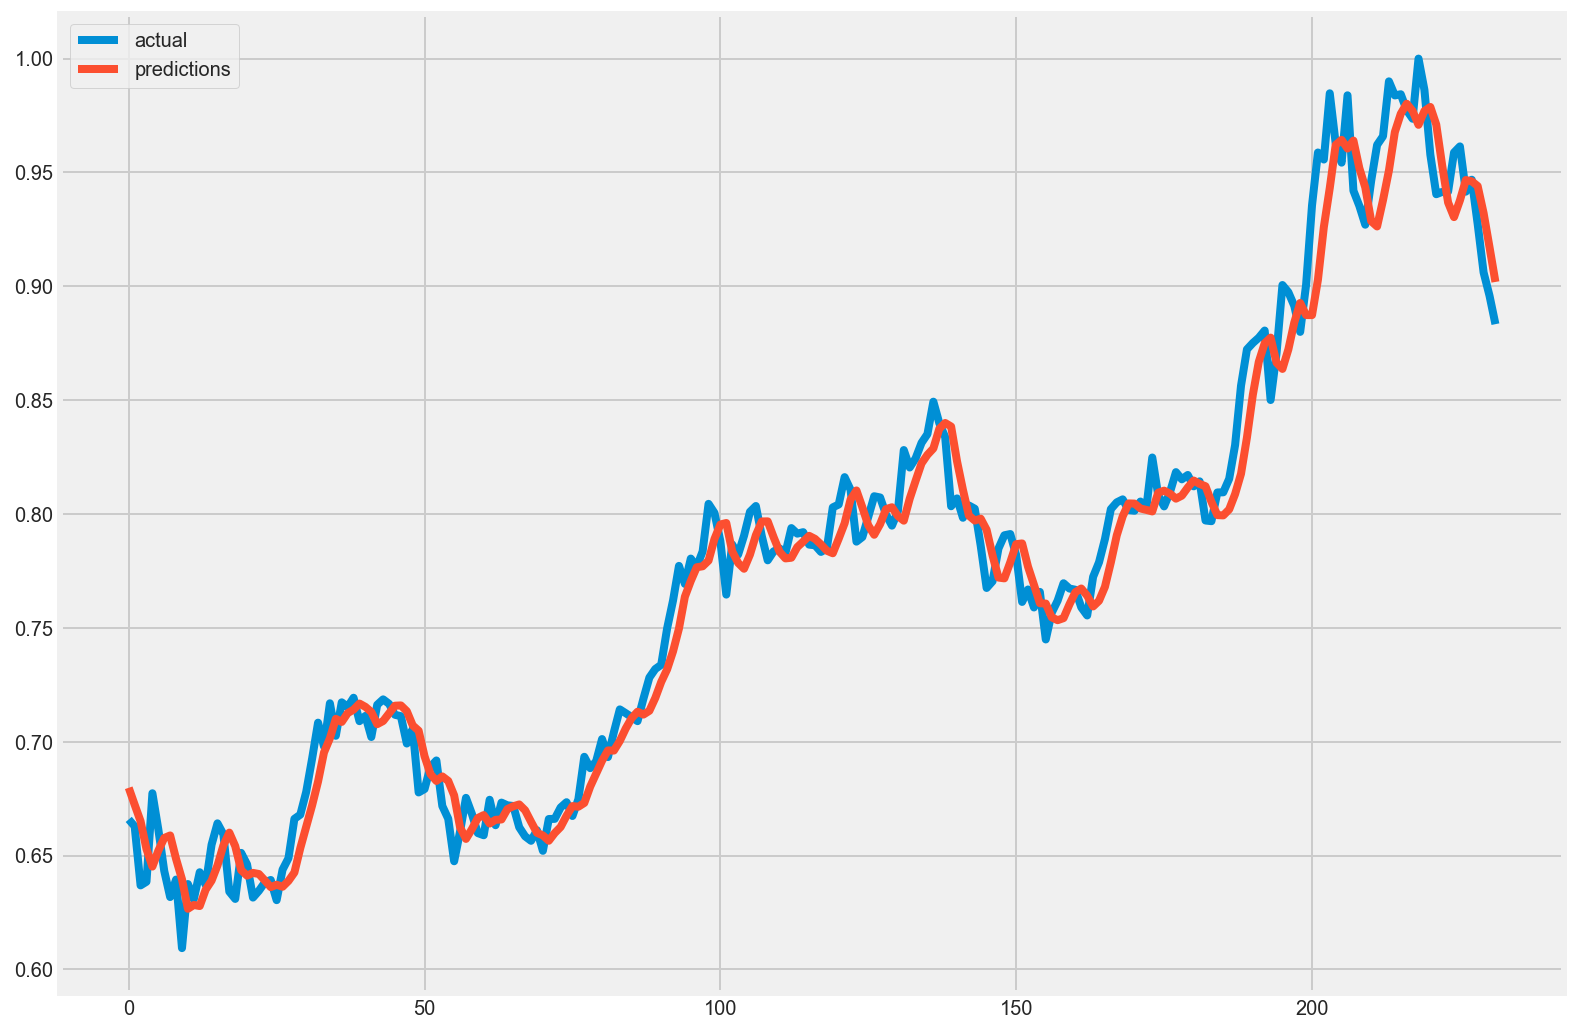

In [478]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='predictions')
plt.legend()
plt.show()

In [482]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RMSE = mean_squared_error(np.asarray(y_test)[20:], pred) ** 0.5
r2 = r2_score(np.asarray(y_test)[20:], pred)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

RMSE: 0.016
R-Squared: 0.974


In [501]:
np.asarray(y_test)[20:].shape, pred.shape

((231, 1), (232, 1))

#### 2) 일변량 LSTM

#### 1) Apple

In [564]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'NFLX', 'NVDA', 'TSLA', 'SBUX', 'UAL', 'T']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [565]:
# Create a new dataframe with only the 'Close column 
data = AAPL.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

In [566]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00783722],
       [0.00634968],
       [0.01192796],
       ...,
       [0.90610636],
       [0.89587207],
       [0.88337677]])

In [567]:
# Create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .9 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 20: , :]
train_data.shape, test_data.shape

((2267, 1), (271, 1))

In [568]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape, y_train.shape

[array([0.00783722, 0.00634968, 0.01192796, 0.01149658, 0.01205972,
       0.01327737, 0.01401476, 0.01395314, 0.01372576, 0.01469479,
       0.01560643, 0.01663922, 0.01830739, 0.02181161, 0.02186474,
       0.02381555, 0.02527333, 0.0227679 , 0.02373267, 0.02371354])]
[0.026418747104362372]

[array([0.00783722, 0.00634968, 0.01192796, 0.01149658, 0.01205972,
       0.01327737, 0.01401476, 0.01395314, 0.01372576, 0.01469479,
       0.01560643, 0.01663922, 0.01830739, 0.02181161, 0.02186474,
       0.02381555, 0.02527333, 0.0227679 , 0.02373267, 0.02371354]), array([0.00634968, 0.01192796, 0.01149658, 0.01205972, 0.01327737,
       0.01401476, 0.01395314, 0.01372576, 0.01469479, 0.01560643,
       0.01663922, 0.01830739, 0.02181161, 0.02186474, 0.02381555,
       0.02527333, 0.0227679 , 0.02373267, 0.02371354, 0.02641875])]
[0.026418747104362372, 0.02603410530702971]



((2247, 20, 1), (2247,))

In [569]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=30, epochs=50)

Epoch 1/50
75/75 [==============================] - 6s 40ms/step - loss: 0.0026
Epoch 2/50
75/75 [==============================] - 3s 42ms/step - loss: 1.9924e-04
Epoch 3/50
75/75 [==============================] - 3s 45ms/step - loss: 1.9610e-04
Epoch 4/50
75/75 [==============================] - 3s 43ms/step - loss: 1.9135e-04
Epoch 5/50
75/75 [==============================] - 3s 43ms/step - loss: 1.7521e-04
Epoch 6/50
75/75 [==============================] - 3s 46ms/step - loss: 1.9503e-04
Epoch 7/50
75/75 [==============================] - 3s 42ms/step - loss: 1.4894e-04
Epoch 8/50
75/75 [==============================] - 3s 44ms/step - loss: 1.4320e-04
Epoch 9/50
75/75 [==============================] - 3s 39ms/step - loss: 1.8655e-04
Epoch 10/50
75/75 [==============================] - 3s 41ms/step - loss: 1.3091e-04
Epoch 11/50
75/75 [==============================] - 3s 41ms/step - loss: 1.1615e-04
Epoch 12/50
75/75 [==============================] - 3s 41ms/step - loss: 1.15

In [570]:
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [571]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

<ipython-input-572-e295cadfc4e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


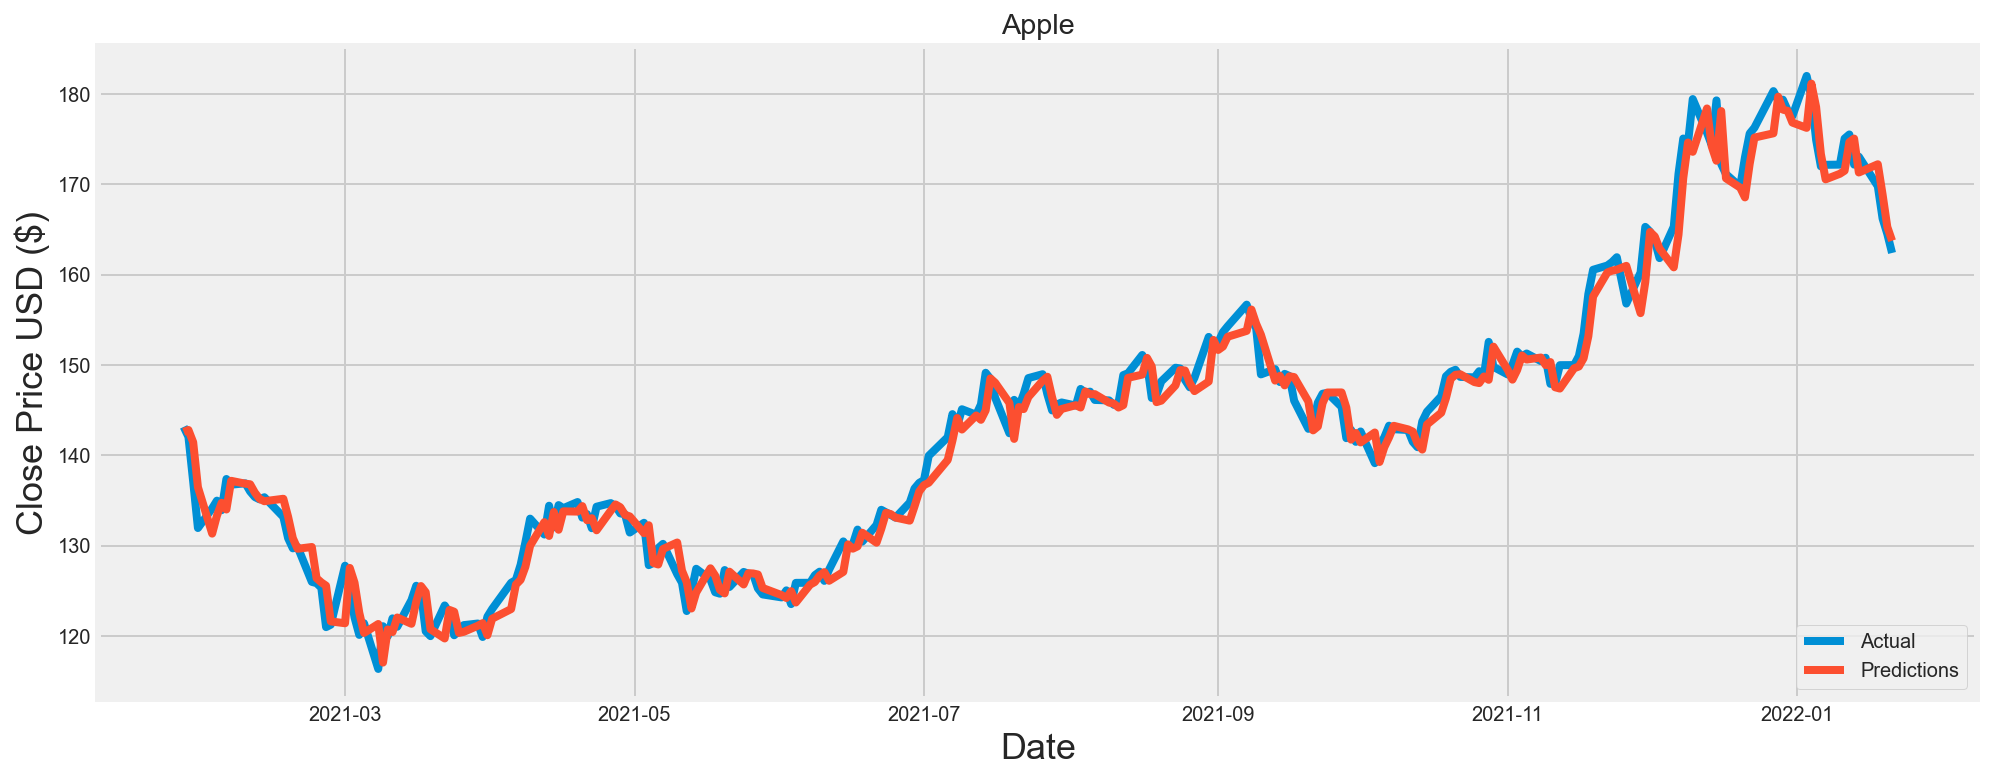

In [572]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(15,6))
plt.title('Apple')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

In [574]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2021-01-26  143.160004   142.616898
2021-01-27  142.059998   142.814453
2021-01-28  137.089996   141.455811
2021-01-29  131.960007   136.481430
2021-02-01  134.139999   131.341354
...                ...          ...
2022-01-14  173.070007   171.318893
2022-01-18  169.800003   172.231735
2022-01-19  166.229996   168.895370
2022-01-20  164.509995   165.290421
2022-01-21  162.410004   163.763901

[251 rows x 2 columns]

In [575]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RMSE = mean_squared_error(data[training_data_len:], predictions)**0.5
r2 = r2_score(data[training_data_len:], predictions)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

RMSE: 2.263
R-Squared: 0.980


In [576]:
score = pd.DataFrame(columns=tech_list,index=['RMSE', 'r2'])
score['AAPL'][0] = RMSE
score['AAPL'][1] = r2
score

AAPL GOOG MSFT AMZN NFLX NVDA TSLA SBUX  UAL    T
RMSE   2.26268  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
r2    0.980245  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

#### 2) Google

In [603]:
# Create a new dataframe with only the 'Close column 
data = GOOG.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .9 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 20: , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=20, epochs=50)

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

RMSE = mean_squared_error(data[training_data_len:], predictions)**0.5
r2 = r2_score(data[training_data_len:], predictions)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

[array([0.00481982, 0.00398405, 0.00190099, 0.00164789, 0.00381107,
       0.00339409, 0.00383474, 0.00396584, 0.00474517, 0.00678818,
       0.00911159, 0.00868915, 0.00924999, 0.00954314, 0.00853257,
       0.00967788, 0.0092336 , 0.00846884, 0.00864364, 0.00830132])]
[0.010005635999188203]

[array([0.00481982, 0.00398405, 0.00190099, 0.00164789, 0.00381107,
       0.00339409, 0.00383474, 0.00396584, 0.00474517, 0.00678818,
       0.00911159, 0.00868915, 0.00924999, 0.00954314, 0.00853257,
       0.00967788, 0.0092336 , 0.00846884, 0.00864364, 0.00830132]), array([0.00398405, 0.00190099, 0.00164789, 0.00381107, 0.00339409,
       0.00383474, 0.00396584, 0.00474517, 0.00678818, 0.00911159,
       0.00868915, 0.00924999, 0.00954314, 0.00853257, 0.00967788,
       0.0092336 , 0.00846884, 0.00864364, 0.00830132, 0.01000564])]
[0.010005635999188203, 0.008902196979928598]

Epoch 1/50
113/113 [==============================] - 15s 69ms/step - loss: 0.0016
Epoch 2/50
113/113 [===============

<ipython-input-604-346f077093c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


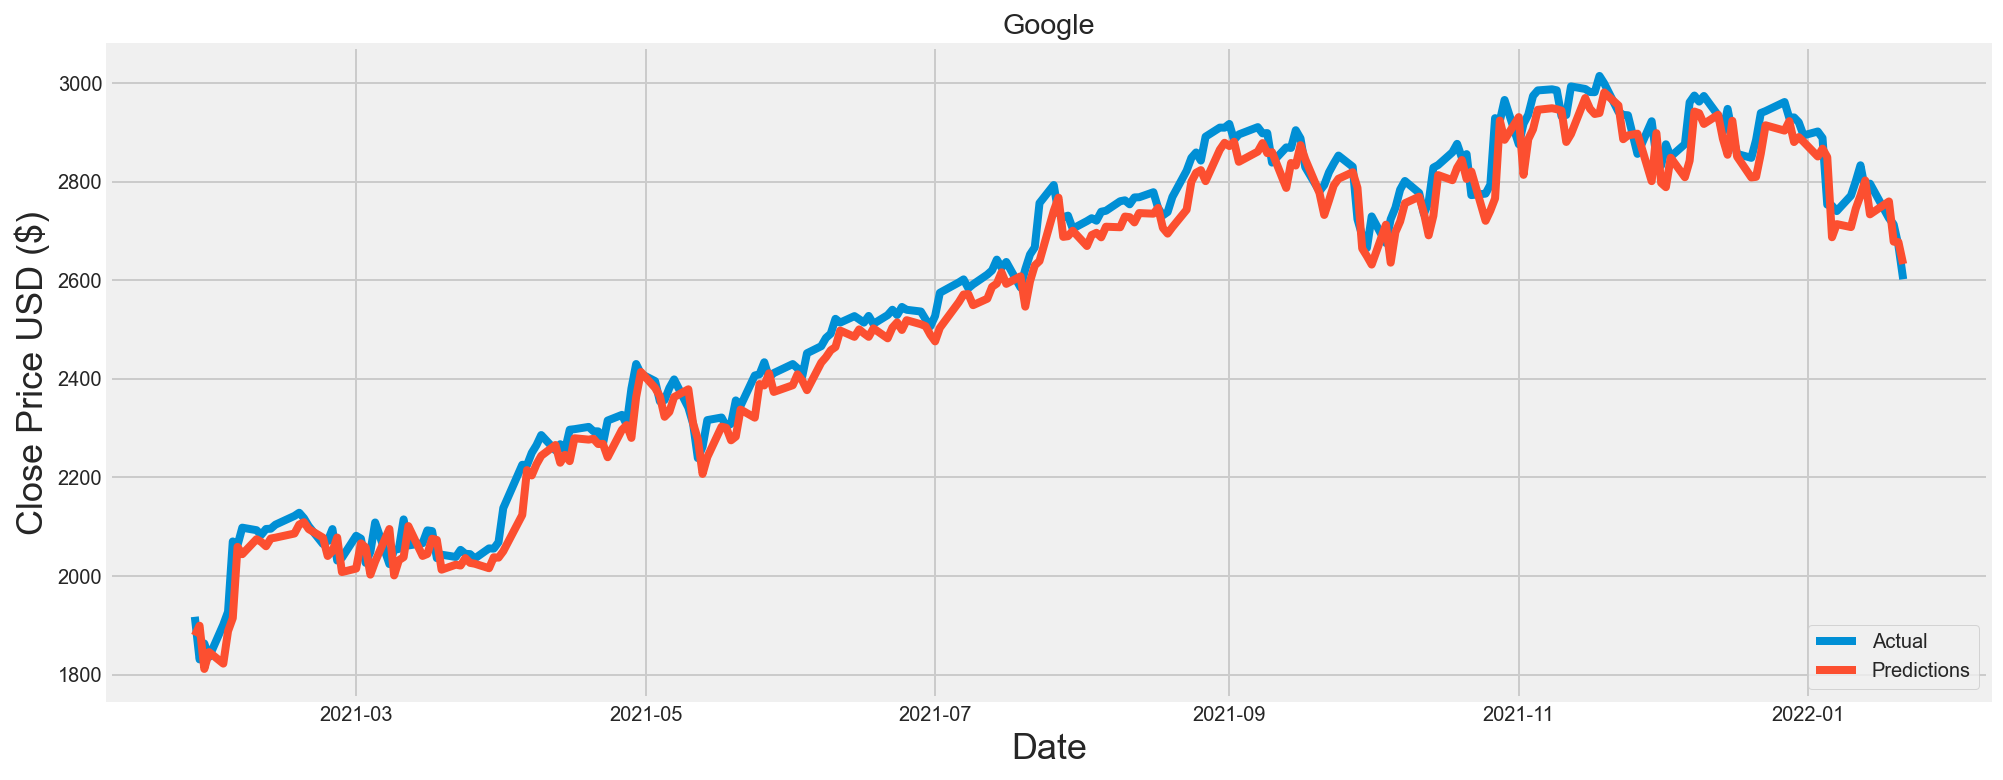

In [604]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(15,6))
plt.title('Google')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

In [605]:
valid

Close  Predictions
Date                                
2021-01-26  1917.239990  1879.094238
2021-01-27  1830.790039  1899.121704
2021-01-28  1863.109985  1811.483643
2021-01-29  1835.739990  1845.664795
2021-02-01  1901.349976  1822.313721
...                 ...          ...
2022-01-14  2795.729980  2733.471924
2022-01-18  2725.810059  2759.585205
2022-01-19  2713.040039  2678.034912
2022-01-20  2670.129883  2677.086670
2022-01-21  2601.840088  2632.662598

[251 rows x 2 columns]

In [606]:
score['GOOG'][0] = RMSE
score['GOOG'][1] = r2
score

AAPL      GOOG      MSFT      AMZN      NFLX      NVDA      TSLA  \
RMSE   2.26268   49.1571   5.34464   62.3973   15.4778   7.09288   30.9725   
r2    0.980245  0.976921  0.976549  0.848717  0.924261  0.985558  0.968125   

          SBUX       UAL         T  
RMSE   1.79168   1.36371  0.391201  
r2    0.883739  0.932998  0.970246

#### 3) Microsoft

In [581]:
# Create a new dataframe with only the 'Close column 
data = MSFT.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .9 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 20: , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=30, epochs=50)

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

RMSE = mean_squared_error(data[training_data_len:], predictions)**0.5
r2 = r2_score(data[training_data_len:], predictions)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

[array([0.01060807, 0.00937677, 0.01007135, 0.00988192, 0.00902948,
       0.01022921, 0.00997664, 0.01111321, 0.01130265, 0.01221822,
       0.01209194, 0.01256551, 0.01354423, 0.01389152, 0.01303908,
       0.01329166, 0.01224979, 0.01161836, 0.01553325, 0.01540696])]
[0.016006819292582464]

[array([0.01060807, 0.00937677, 0.01007135, 0.00988192, 0.00902948,
       0.01022921, 0.00997664, 0.01111321, 0.01130265, 0.01221822,
       0.01209194, 0.01256551, 0.01354423, 0.01389152, 0.01303908,
       0.01329166, 0.01224979, 0.01161836, 0.01553325, 0.01540696]), array([0.00937677, 0.01007135, 0.00988192, 0.00902948, 0.01022921,
       0.00997664, 0.01111321, 0.01130265, 0.01221822, 0.01209194,
       0.01256551, 0.01354423, 0.01389152, 0.01303908, 0.01329166,
       0.01224979, 0.01161836, 0.01553325, 0.01540696, 0.01600682])]
[0.016006819292582464, 0.015470101212748971]

Epoch 1/50
75/75 [==============================] - 11s 67ms/step - loss: 0.0028
Epoch 2/50
75/75 [===================

In [582]:
score['MSFT'][0] = RMSE
score['MSFT'][1] = r2
score

AAPL      GOOG      MSFT AMZN NFLX NVDA TSLA SBUX  UAL    T
RMSE   2.26268    64.263   5.34464  NaN  NaN  NaN  NaN  NaN  NaN  NaN
r2    0.980245  0.960557  0.976549  NaN  NaN  NaN  NaN  NaN  NaN  NaN

<ipython-input-583-82f4820e0235>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


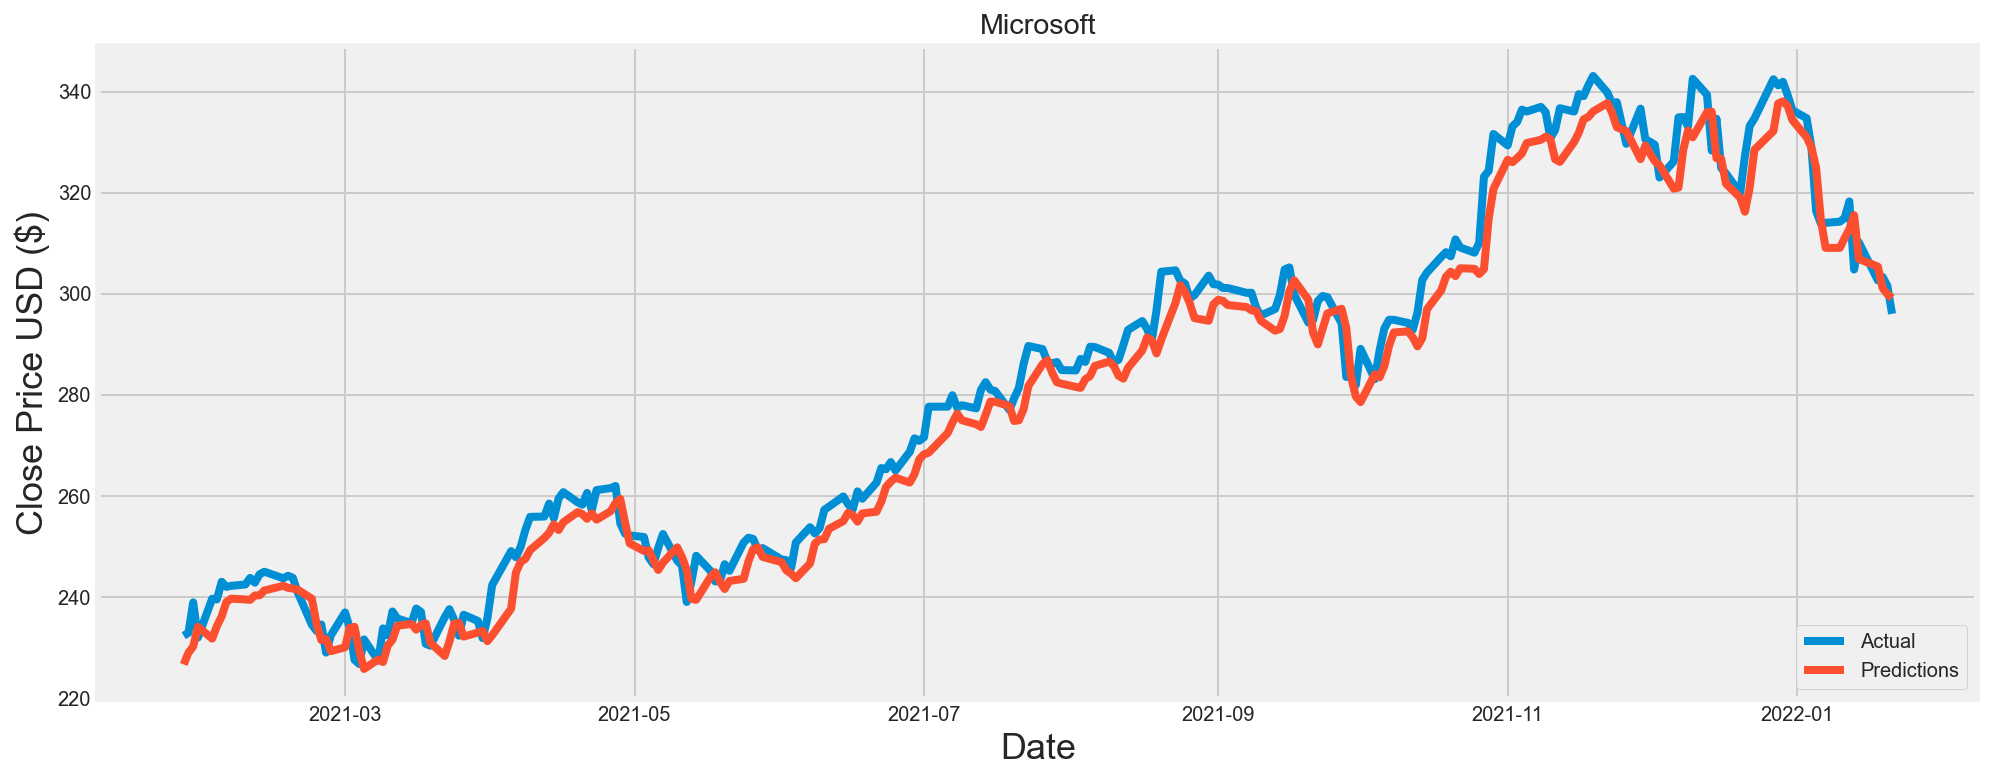

In [583]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(15,6))
plt.title('Microsoft')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

#### 4) Amazon

In [532]:
# Create a new dataframe with only the 'Close column 
data = AMZN.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .9 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 20: , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=30, epochs=50)

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

RMSE = mean_squared_error(data[training_data_len:], predictions)**0.5
r2 = r2_score(data[training_data_len:], predictions)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

score['AMZN'][0] = RMSE
score['AMZN'][1] = r2

[array([0.00212785, 0.00238398, 0.00260915, 0.00416282, 0.00473982,
       0.00383351, 0.00447806, 0.00026176, 0.00089786, 0.00257537,
       0.00129754, 0.00159307, 0.00195616, 0.00181543, 0.00197305,
       0.00367589, 0.00359427, 0.00167188, 0.00039404, 0.0011174 ])]
[0.0010498513370926152]

[array([0.00212785, 0.00238398, 0.00260915, 0.00416282, 0.00473982,
       0.00383351, 0.00447806, 0.00026176, 0.00089786, 0.00257537,
       0.00129754, 0.00159307, 0.00195616, 0.00181543, 0.00197305,
       0.00367589, 0.00359427, 0.00167188, 0.00039404, 0.0011174 ]), array([0.00238398, 0.00260915, 0.00416282, 0.00473982, 0.00383351,
       0.00447806, 0.00026176, 0.00089786, 0.00257537, 0.00129754,
       0.00159307, 0.00195616, 0.00181543, 0.00197305, 0.00367589,
       0.00359427, 0.00167188, 0.00039404, 0.0011174 , 0.00104985])]
[0.0010498513370926152, 0.0005769975630379176]

Epoch 1/50
75/75 [==============================] - 9s 44ms/step - loss: 0.0034
Epoch 2/50
75/75 [=================

In [607]:
# Create a new dataframe with only the 'Close column 
data = AMZN.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .9 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 10: , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 11:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=15, epochs=50)

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

RMSE = mean_squared_error(data[training_data_len:], predictions)**0.5
r2 = r2_score(data[training_data_len:], predictions)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

score['AMZN'][0] = RMSE
score['AMZN'][1] = r2

[array([0.00212785, 0.00238398, 0.00260915, 0.00416282, 0.00473982,
       0.00383351, 0.00447806, 0.00026176, 0.00089786, 0.00257537])]
[0.0012975391014639348]

[array([0.00212785, 0.00238398, 0.00260915, 0.00416282, 0.00473982,
       0.00383351, 0.00447806, 0.00026176, 0.00089786, 0.00257537]), array([0.00238398, 0.00260915, 0.00416282, 0.00473982, 0.00383351,
       0.00447806, 0.00026176, 0.00089786, 0.00257537, 0.00129754])]
[0.0012975391014639348, 0.0015930748576312923]

Epoch 1/50
151/151 [==============================] - 12s 35ms/step - loss: 0.0023
Epoch 2/50
151/151 [==============================] - 6s 43ms/step - loss: 2.8881e-04
Epoch 3/50
151/151 [==============================] - 5s 36ms/step - loss: 2.4776e-04
Epoch 4/50
151/151 [==============================] - 5s 33ms/step - loss: 2.5464e-04
Epoch 5/50
151/151 [==============================] - 5s 33ms/step - loss: 2.5472e-04
Epoch 6/50
151/151 [==============================] - 5s 33ms/step - loss: 2.4534e-04
Epoc

<ipython-input-608-7ab6b172c333>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


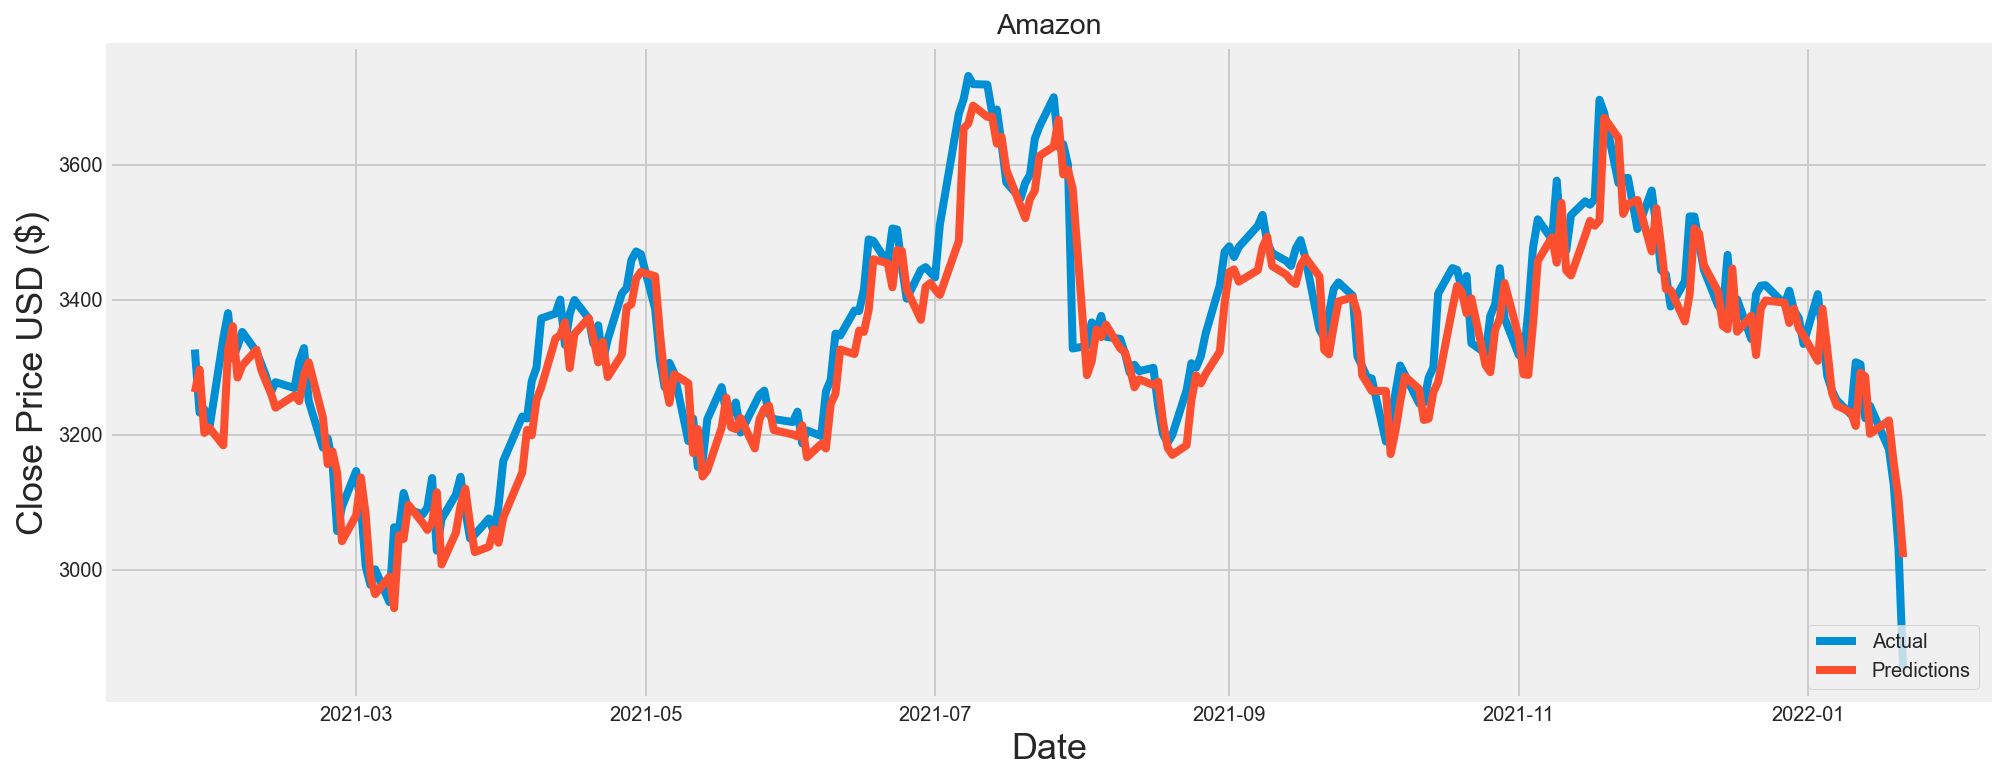

In [608]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(15,6))
plt.title('Amazon')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

#### 5) Netflix

In [586]:
# Create a new dataframe with only the 'Close column 
data = NFLX.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .9 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 10: , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 11:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=20, epochs=50)

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

RMSE = mean_squared_error(data[training_data_len:], predictions)**0.5
r2 = r2_score(data[training_data_len:], predictions)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

score['NFLX'][0] = RMSE
score['NFLX'][1] = r2

[array([0.00838758, 0.00811816, 0.00861315, 0.01299282, 0.0146177 ,
       0.01496022, 0.01386792, 0.01444644, 0.01466156, 0.01516908])]
[0.015758048910919056]

[array([0.00838758, 0.00811816, 0.00861315, 0.01299282, 0.0146177 ,
       0.01496022, 0.01386792, 0.01444644, 0.01466156, 0.01516908]), array([0.00811816, 0.00861315, 0.01299282, 0.0146177 , 0.01496022,
       0.01386792, 0.01444644, 0.01466156, 0.01516908, 0.01575805])]
[0.015758048910919056, 0.01547191773630156]

Epoch 1/50
113/113 [==============================] - 9s 31ms/step - loss: 0.0032
Epoch 2/50
113/113 [==============================] - 4s 33ms/step - loss: 3.8298e-04: 0s - loss: 3.8781e-0 - ETA: 0s - loss: 3.8598
Epoch 3/50
113/113 [==============================] - 4s 32ms/step - loss: 3.7489e-04
Epoch 4/50
113/113 [==============================] - 3s 30ms/step - loss: 3.8877e-04
Epoch 5/50
113/113 [==============================] - 4s 32ms/step - loss: 3.2802e-04
Epoch 6/50
113/113 [============================

<ipython-input-587-55f31a111cbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


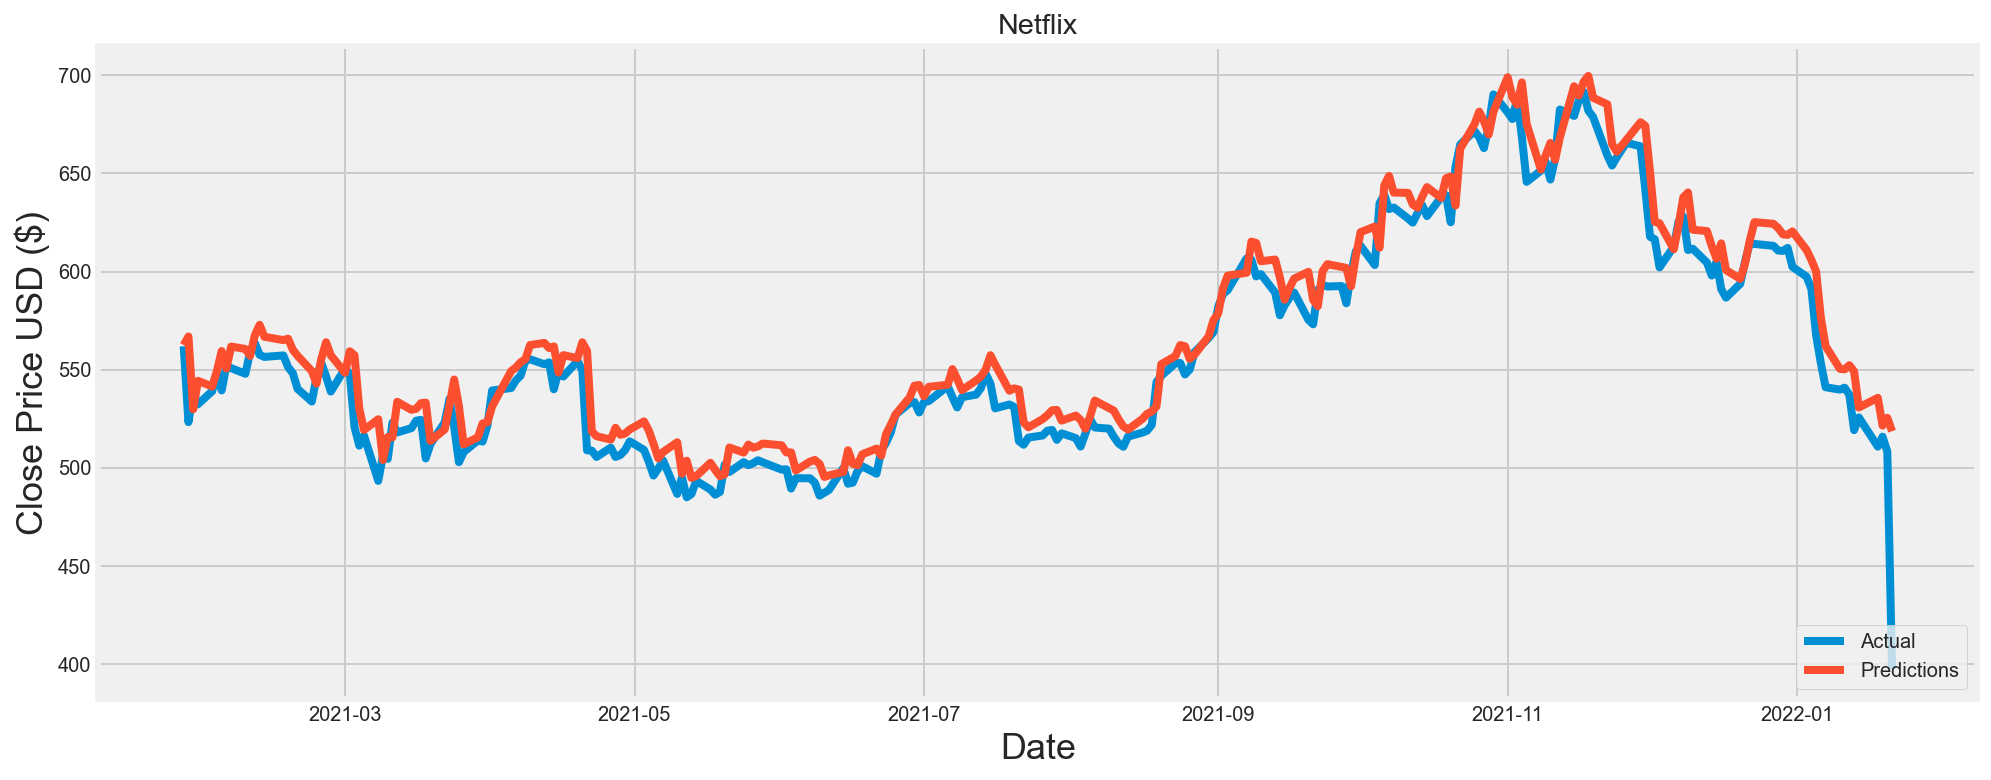

In [587]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(15,6))
plt.title('Netflix')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

#### 6) Nvidia

In [588]:
# Create a new dataframe with only the 'Close column 
data = NVDA.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .9 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 20: , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=30, epochs=50)

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

RMSE = mean_squared_error(data[training_data_len:], predictions)**0.5
r2 = r2_score(data[training_data_len:], predictions)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

score['NVDA'][0] = RMSE
score['NVDA'][1] = r2

[array([0.0024402 , 0.00268951, 0.00262152, 0.00251575, 0.00266685,
       0.00258375, 0.00256108, 0.00268196, 0.00310503, 0.00335434,
       0.00326368, 0.0032939 , 0.00372452, 0.00371697, 0.00341477,
       0.00360364, 0.00367164, 0.00361875, 0.00383029, 0.003377  ])]
[0.003437438660119139]

[array([0.0024402 , 0.00268951, 0.00262152, 0.00251575, 0.00266685,
       0.00258375, 0.00256108, 0.00268196, 0.00310503, 0.00335434,
       0.00326368, 0.0032939 , 0.00372452, 0.00371697, 0.00341477,
       0.00360364, 0.00367164, 0.00361875, 0.00383029, 0.003377  ]), array([0.00268951, 0.00262152, 0.00251575, 0.00266685, 0.00258375,
       0.00256108, 0.00268196, 0.00310503, 0.00335434, 0.00326368,
       0.0032939 , 0.00372452, 0.00371697, 0.00341477, 0.00360364,
       0.00367164, 0.00361875, 0.00383029, 0.003377  , 0.00343744])]
[0.003437438660119139, 0.0033543352898315667]

Epoch 1/50
75/75 [==============================] - 12s 69ms/step - loss: 8.7574e-04
Epoch 2/50
75/75 [==============

<ipython-input-589-d3bbc6a0eac5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


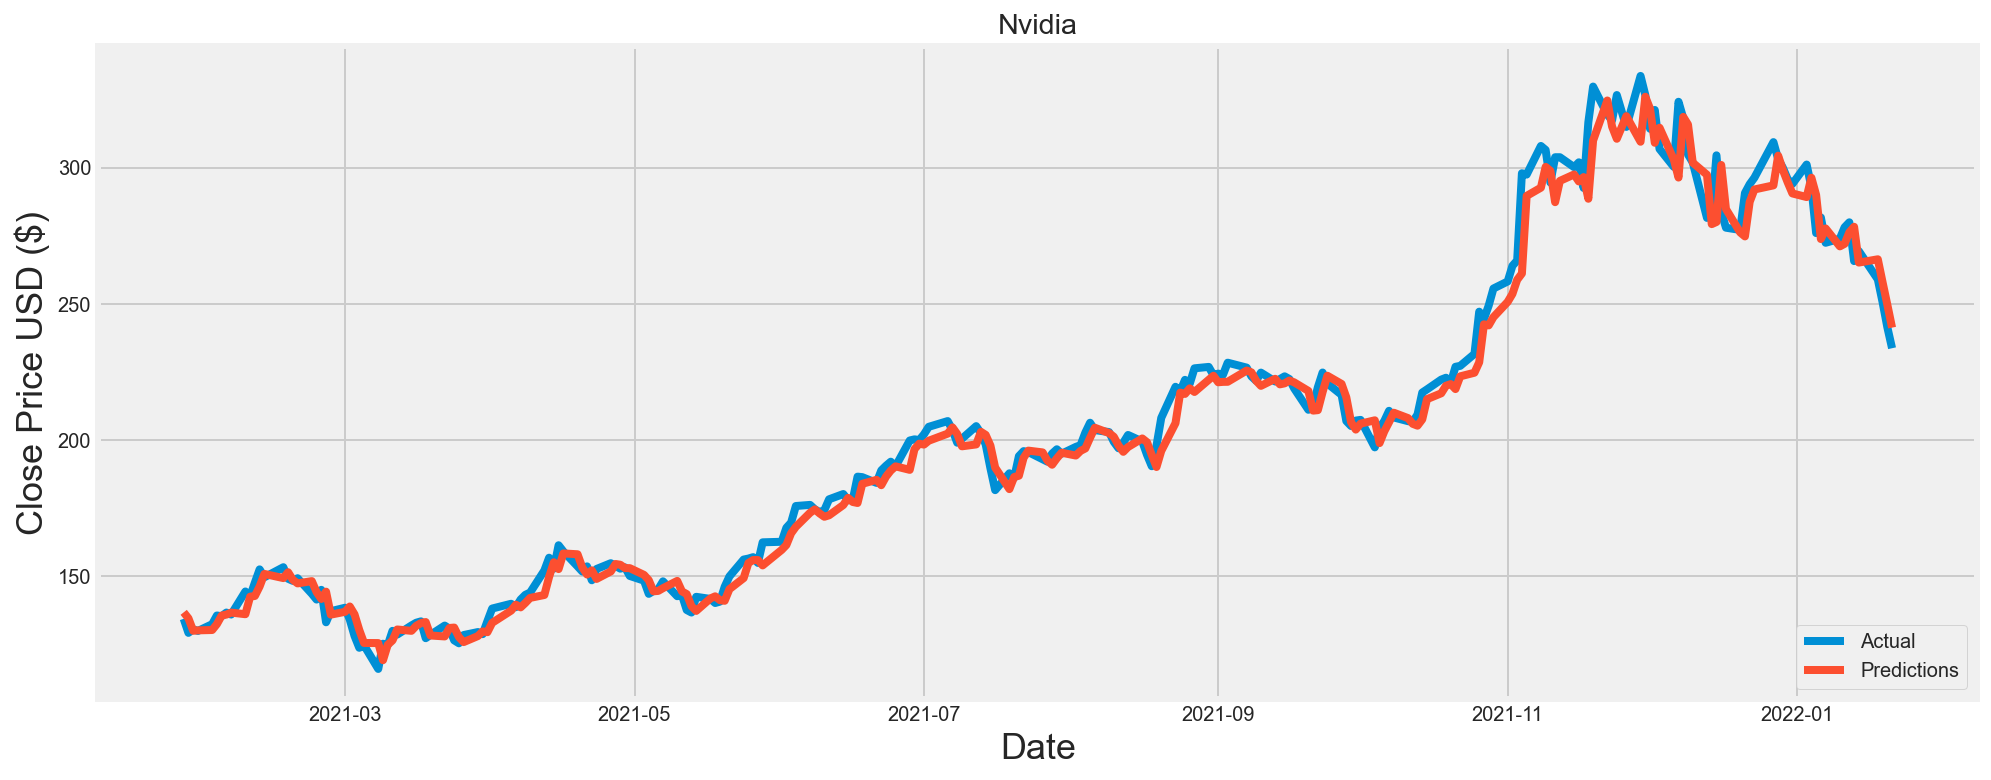

In [589]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(15,6))
plt.title('Nvidia')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

#### 7) Tesla

In [590]:
# Create a new dataframe with only the 'Close column 
data = TSLA.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .9 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 10: , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 11:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=20, epochs=50)

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

RMSE = mean_squared_error(data[training_data_len:], predictions)**0.5
r2 = r2_score(data[training_data_len:], predictions)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

score['TSLA'][0] = RMSE
score['TSLA'][1] = r2

[array([0.00010942, 0.00021557, 0.00030538, 0.00046379, 0.00052748,
       0.00056667, 0.00048502, 0.00056831, 0.00067772, 0.0008247 ])]
[0.0009308480605797042]

[array([0.00010942, 0.00021557, 0.00030538, 0.00046379, 0.00052748,
       0.00056667, 0.00048502, 0.00056831, 0.00067772, 0.0008247 ]), array([0.00021557, 0.00030538, 0.00046379, 0.00052748, 0.00056667,
       0.00048502, 0.00056831, 0.00067772, 0.0008247 , 0.00093085])]
[0.0009308480605797042, 0.0008981867661053298]

Epoch 1/50
113/113 [==============================] - 10s 31ms/step - loss: 7.4952e-04
Epoch 2/50
113/113 [==============================] - 3s 31ms/step - loss: 1.3310e-04
Epoch 3/50
113/113 [==============================] - 3s 31ms/step - loss: 1.4709e-04
Epoch 4/50
113/113 [==============================] - 4s 31ms/step - loss: 1.6392e-04
Epoch 5/50
113/113 [==============================] - 3s 31ms/step - loss: 1.1117e-04: 1s - loss: 1.2425 - ET
Epoch 6/50
113/113 [==============================] - 3s 31ms/

<ipython-input-591-6dad11e373a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


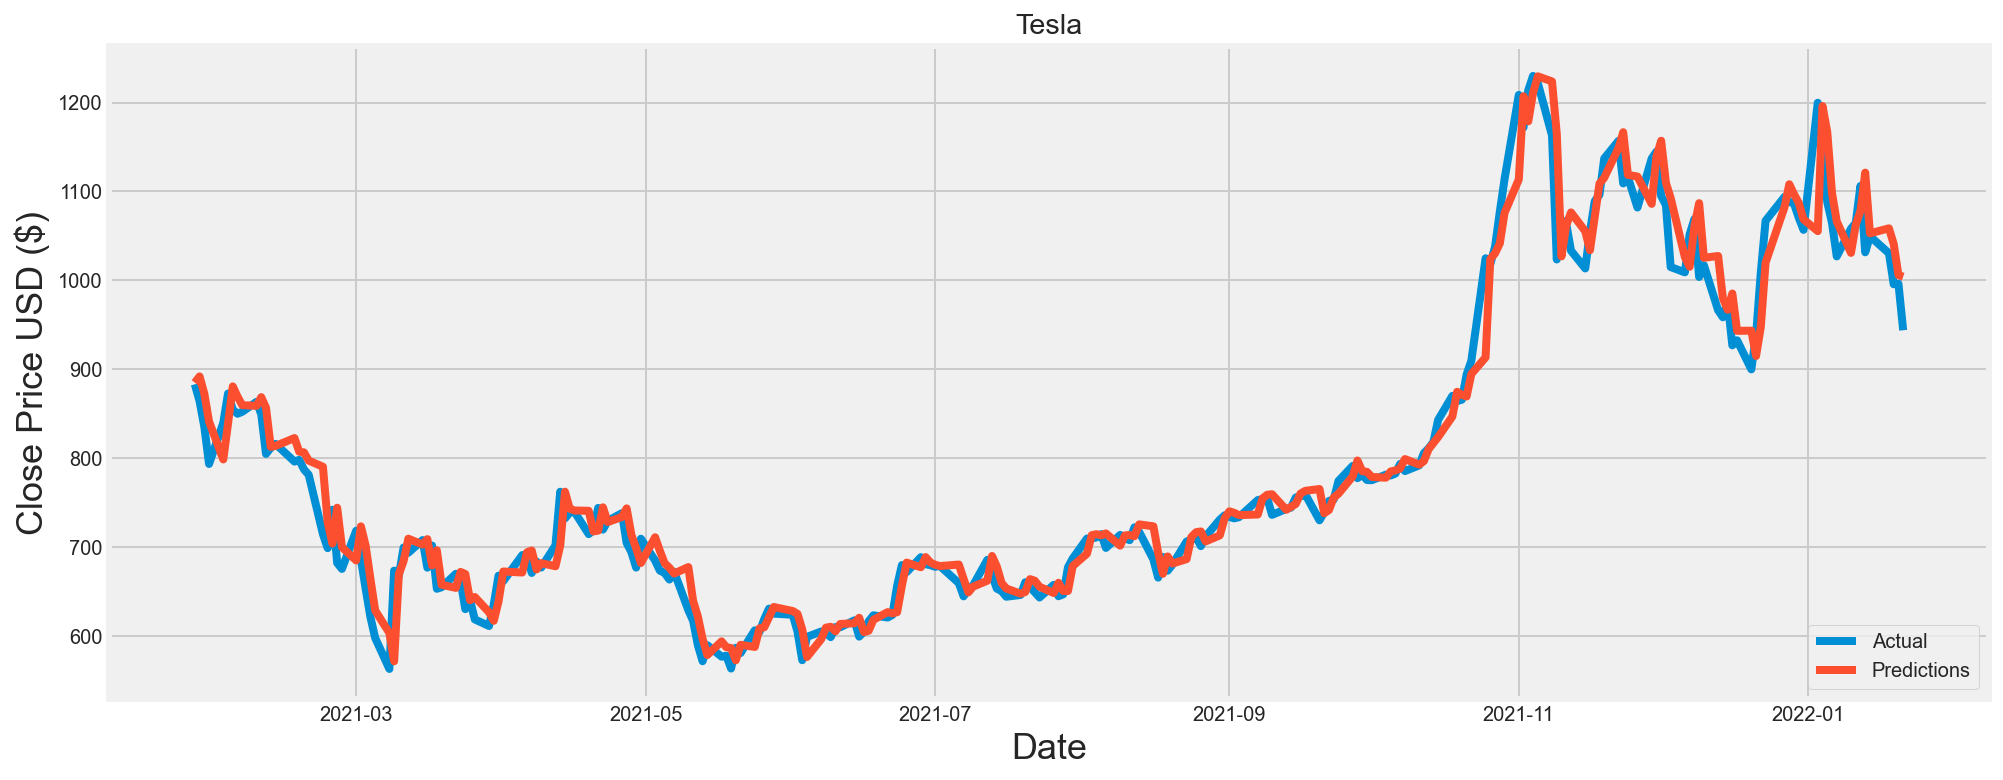

In [591]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(15,6))
plt.title('Tesla')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

#### 8) Starbucks

In [592]:
# Create a new dataframe with only the 'Close column 
data = SBUX.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .9 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 10: , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 11:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=30)

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

RMSE = mean_squared_error(data[training_data_len:], predictions)**0.5
r2 = r2_score(data[training_data_len:], predictions)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

score['SBUX'][0] = RMSE
score['SBUX'][1] = r2

[array([0.02000383, 0.02148737, 0.02206164, 0.02478944, 0.02244448,
       0.02545942, 0.02277947, 0.02431088, 0.02153522, 0.02469372])]
[0.02455015880667591]

[array([0.02000383, 0.02148737, 0.02206164, 0.02478944, 0.02244448,
       0.02545942, 0.02277947, 0.02431088, 0.02153522, 0.02469372]), array([0.02148737, 0.02206164, 0.02478944, 0.02244448, 0.02545942,
       0.02277947, 0.02431088, 0.02153522, 0.02469372, 0.02455016])]
[0.02455015880667591, 0.02512442629615322]

Epoch 1/30
226/226 [==============================] - 16s 35ms/step - loss: 0.0028 2
Epoch 2/30
226/226 [==============================] - 8s 35ms/step - loss: 3.4969e-04
Epoch 3/30
226/226 [==============================] - 8s 33ms/step - loss: 3.6231e-04
Epoch 4/30
226/226 [==============================] - 7s 33ms/step - loss: 2.9698e-04
Epoch 5/30
226/226 [==============================] - 7s 33ms/step - loss: 3.0848e-04
Epoch 6/30
226/226 [==============================] - 7s 33ms/step - loss: 2.9653e-04: 0s - lo

<ipython-input-593-2dca85d3dbfa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


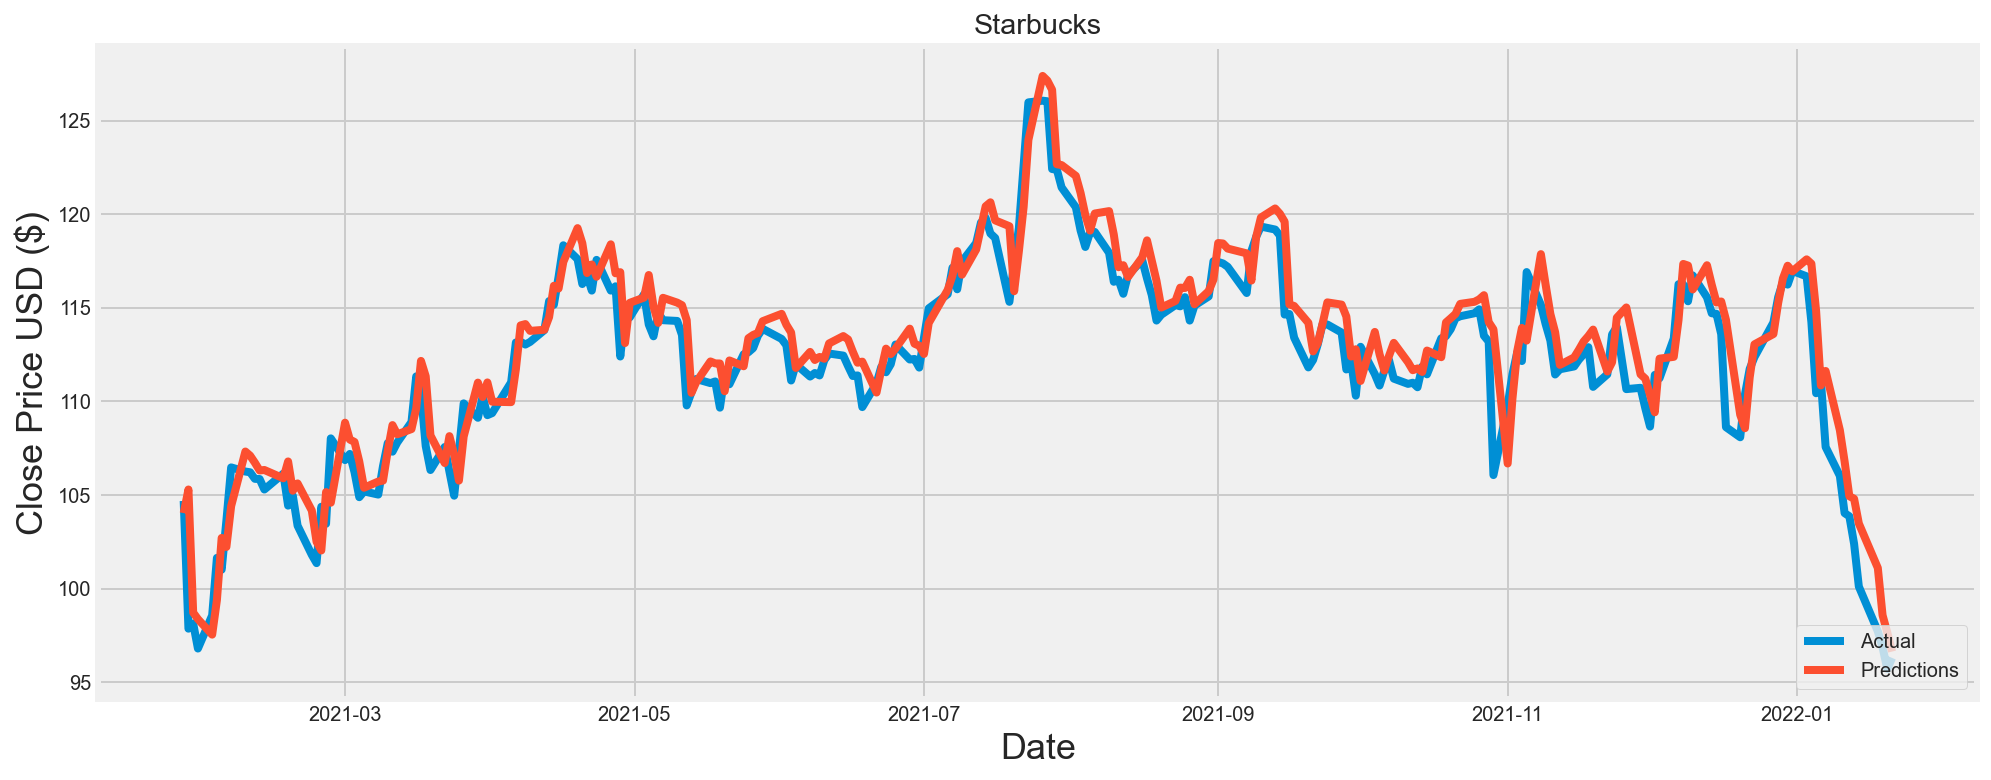

In [593]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(15,6))
plt.title('Starbucks')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

#### 9) United Airlines

In [594]:
# Create a new dataframe with only the 'Close column 
data = UAL.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .9 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 10: , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 11:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=20, epochs=50)

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

RMSE = mean_squared_error(data[training_data_len:], predictions)**0.5
r2 = r2_score(data[training_data_len:], predictions)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

score['UAL'][0] = RMSE
score['UAL'][1] = r2

[array([0.01469843, 0.0205271 , 0.03332488, 0.04967056, 0.06728332,
       0.06601621, 0.06741003, 0.06880383, 0.07995438, 0.0911049 ])]
[0.08172832185915166]

[array([0.01469843, 0.0205271 , 0.03332488, 0.04967056, 0.06728332,
       0.06601621, 0.06741003, 0.06880383, 0.07995438, 0.0911049 ]), array([0.0205271 , 0.03332488, 0.04967056, 0.06728332, 0.06601621,
       0.06741003, 0.06880383, 0.07995438, 0.0911049 , 0.08172832])]
[0.08172832185915166, 0.08210846235670141]

Epoch 1/50
113/113 [==============================] - 11s 38ms/step - loss: 0.0102
Epoch 2/50
113/113 [==============================] - 4s 36ms/step - loss: 0.0014
Epoch 3/50
113/113 [==============================] - 4s 37ms/step - loss: 0.0014
Epoch 4/50
113/113 [==============================] - 4s 36ms/step - loss: 0.0013
Epoch 5/50
113/113 [==============================] - 4s 38ms/step - loss: 0.0016
Epoch 6/50
113/113 [==============================] - 4s 38ms/step - loss: 0.0012
Epoch 7/50
113/113 [==========

<ipython-input-595-5f92cf37fb32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


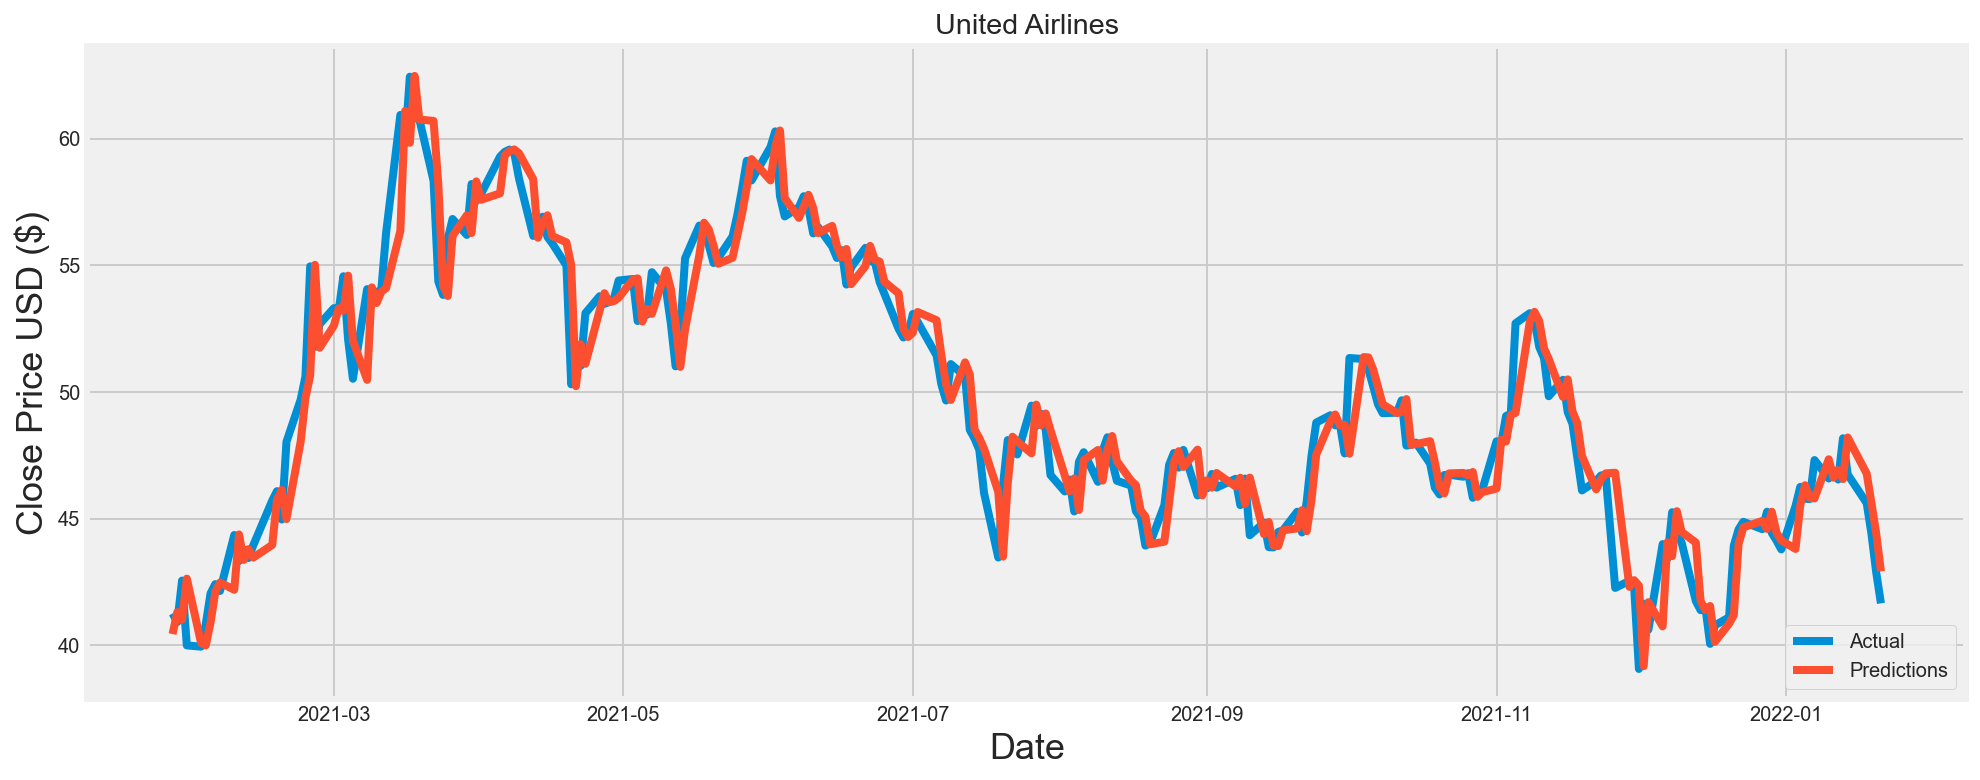

In [595]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(15,6))
plt.title('United Airlines')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

#### 10) AT&T

In [596]:
# Create a new dataframe with only the 'Close column 
data = T.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .9 ))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 10: , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 11:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=20, epochs=50)

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

RMSE = mean_squared_error(data[training_data_len:], predictions)**0.5
r2 = r2_score(data[training_data_len:], predictions)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

score['T'][0] = RMSE
score['T'][1] = r2

[array([0.38638493, 0.37183097, 0.37746472, 0.34178405, 0.32816899,
       0.3366197 , 0.33990607, 0.34882629, 0.3577465 , 0.36525823])]
[0.36619712760475087]

[array([0.38638493, 0.37183097, 0.37746472, 0.34178405, 0.32816899,
       0.3366197 , 0.33990607, 0.34882629, 0.3577465 , 0.36525823]), array([0.37183097, 0.37746472, 0.34178405, 0.32816899, 0.3366197 ,
       0.33990607, 0.34882629, 0.3577465 , 0.36525823, 0.36619713])]
[0.36619712760475087, 0.36948358762408406]

Epoch 1/50
113/113 [==============================] - 11s 39ms/step - loss: 0.0122
Epoch 2/50
113/113 [==============================] - 4s 37ms/step - loss: 0.0015
Epoch 3/50
113/113 [==============================] - 4s 38ms/step - loss: 0.0014
Epoch 4/50
113/113 [==============================] - 4s 38ms/step - loss: 0.0014
Epoch 5/50
113/113 [==============================] - 5s 40ms/step - loss: 0.0014
Epoch 6/50
113/113 [==============================] - 5s 41ms/step - loss: 0.0013
Epoch 7/50
113/113 [==========

<ipython-input-597-7a1c21be7fa8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


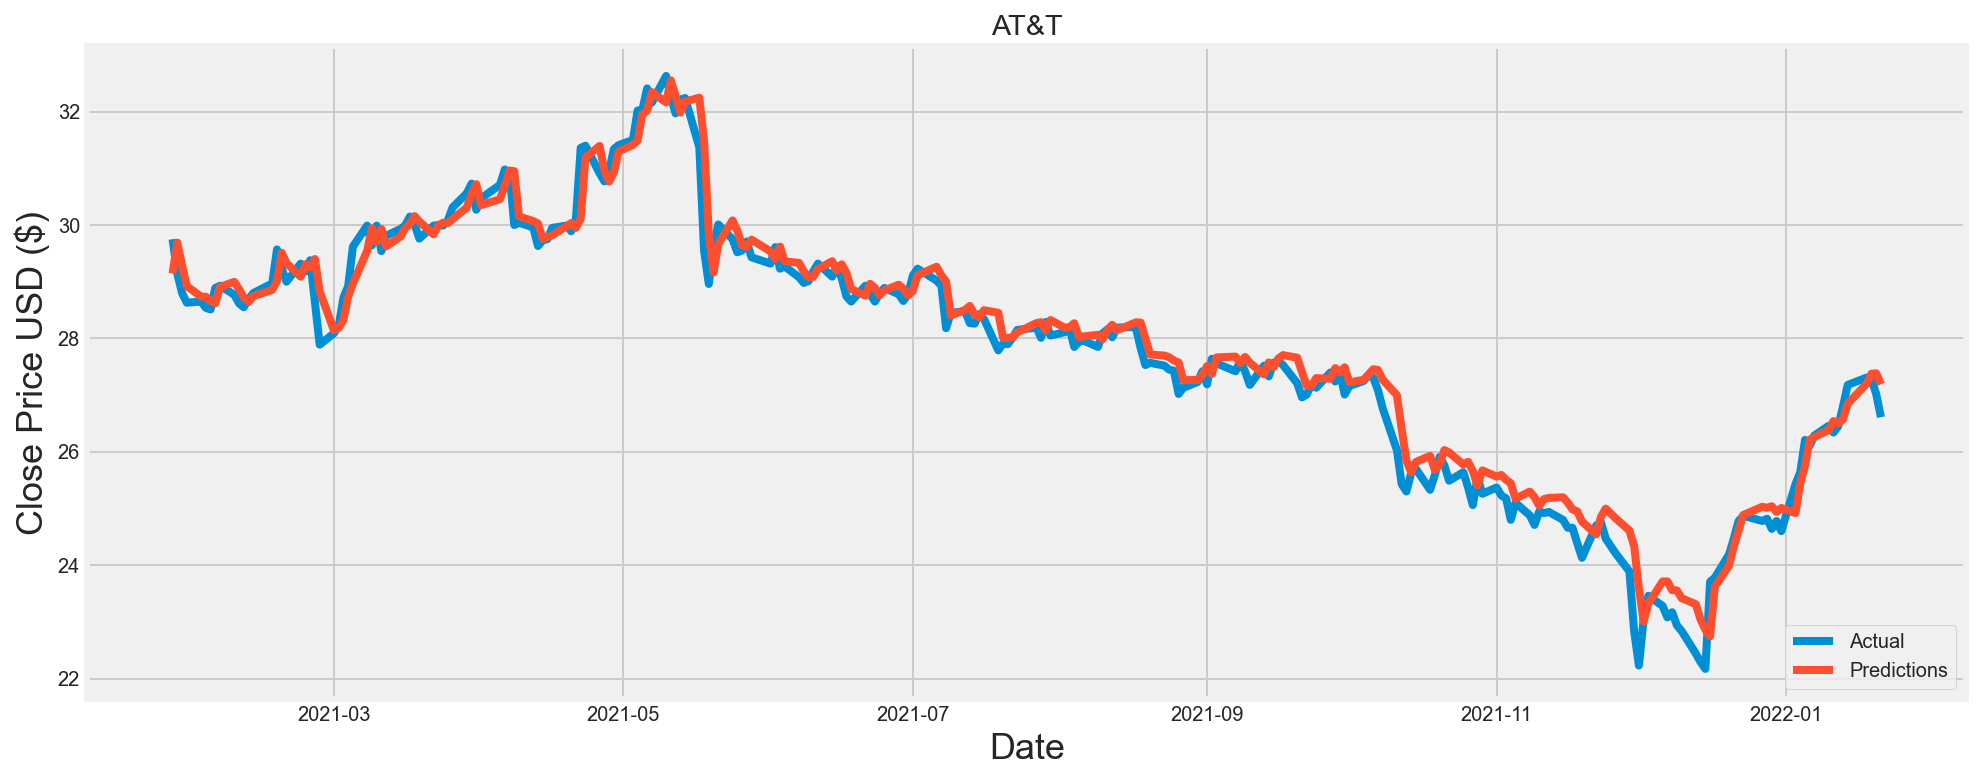

In [597]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(15,6))
plt.title('AT&T')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

In [609]:
score

AAPL      GOOG      MSFT      AMZN      NFLX      NVDA      TSLA  \
RMSE   2.26268   49.1571   5.34464   56.7055   15.4778   7.09288   30.9725   
r2    0.980245  0.976921  0.976549  0.875058  0.924261  0.985558  0.968125   

          SBUX       UAL         T  
RMSE   1.79168   1.36371  0.391201  
r2    0.883739  0.932998  0.970246